# Menganalisis Keterkaitan Ekonomi, Akses Kesehatan, dan Infrastruktur terhadap Kesehatan Masyarakat di Jawa Barat menggunakan Exploratory Data Analysis (EDA)

# Kelompok 8


##### 1. Hasbi Haqqul Fikri (2309245)
##### 2. Naeya Adeani Putri (2304017)
##### 3. Ririn Marchelina (2303662)
##### 4. Muhammad Ichsan Khairullah (2306924)
##### 5. Ismail Fatih Raihan (2307840)

# Pendahuluan


#####Kesehatan masyarakat di Jawa Barat dipengaruhi oleh banyak faktor, salah satunya kondisi ekonomi, akses terhadap layanan kesehatan, dan infrastruktur. Ketiga faktor ini berperan penting dalam menentukan kualitas hidup masyarakat. Melalui tugas ini, kami ingin menganalisis bagaimana keterkaitan faktor-faktor tersebut terhadap kesehatan masyarakat di Jawa Barat.
#####Untuk itu, kami akan menggunakan Exploratory Data Analysis (EDA) sebagai metode utama. EDA memungkinkan kita melihat pola dan hubungan di antara data, sehingga kita bisa memahami lebih dalam tentang pengaruh ekonomi, akses kesehatan, dan infrastruktur terhadap kesehatan masyarakat. Dengan hasil ini, kami berharap dapat memberikan wawasan yang bermanfaat bagi upaya peningkatan kualitas hidup di Jawa Barat.

# Rumusan Masalah










#####1. Bagaimana tren perubahan jumlah kasus penyakit seperti diare, DBD, malaria, dan HIV di Jawa Barat selama periode 2020-2023?
#####2. Faktor apa saja yang mempengaruhi fluktuasi jumlah kasus penyakit tersebut di berbagai kabupaten/kota di Jawa Barat?
#####3. Bagaimana tren jumlah kasus penyakit di Jawa Barat selama 2020-2023, dan apakah ada pola yang signifikan dalam penyebaran penyakit tersebut?
#####4. Seberapa besar hubungan antara jumlah fasilitas kesehatan, termasuk rumah sakit dan tenaga kesehatan, dengan tingkat kematian di Jawa Barat selama beberapa tahun terakhir?
#####5. Apakah ada korelasi antara indeks kesehatan dan persentase kemiskinan di Jawa Barat, dan bagaimana faktor ekonomi mempengaruhi kesehatan masyarakat?
#####6. Bagaimana distribusi jumlah rumah sakit di setiap kabupaten/kota di Jawa Barat memengaruhi akses dan kualitas layanan kesehatan?
#####7. Apakah ada tren tertentu dalam jumlah kematian dan penyebabnya di Jawa Barat selama 2017-2019, dan faktor apa saja yang berkontribusi terhadap angka kematian tersebut?
#####8. Bagaimana perubahan indeks kesehatan di Jawa Barat selama 2010-2022, dan faktor apa yang memengaruhi peningkatan atau penurunannya?



## Import Libraries



##### 1. %matplotlib inline: Menampilkan grafik Matplotlib secara langsung di Jupyter Notebook.
##### 2. NumPy: Library untuk manipulasi array dan operasi matematis yang efisien.
##### 3. Pandas: Library untuk manipulasi dan analisis data dengan struktur DataFrame dan Series.
##### 4. Matplotlib: Library plotting 2D untuk membuat berbagai jenis grafik.
##### 5. Seaborn: Library visualisasi data yang berbasis Matplotlib, dengan antarmuka yang lebih menarik dan informatif.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

##Menghubungkan Ke Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data Set

In [37]:
# membaca data dari tabel untuk disimpan didalam variabel
df_malaria = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18554_jml_kasus_penyakit_malaria__kabupatenkota_v1_data.csv")
df_dbd = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18509_jml_kasus_penyakit_demam_berdarah_dengue_dbd__kabu_v1_data.csv")
df_diare = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18553_jml_kasus_penyakit_diare__kabupatenkota_v1_data.csv")
df_HIV = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_18510_jumlah_kasus_hiv_berdasarkan_kabupatenkota_v2_data.csv")
df_penduduk_miskin = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/bps-od_17058_persentase_penduduk_miskin__kabupatenkota_v2_data.csv")
df_indeks_kesehatan = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/bps-od_17517_indeks_kesehatan_berdasarkan_kabupatenkota_data.csv")
df_tenaga_kesehatan = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_17171_jml_tenaga_kesehatan_di_rumah_sakit__kategori_jk_v1_data.csv")
df_rumah_sakit = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/dinkes-od_17409_daftar_rumah_sakit_berdasarkan_jenis_dan_kelas_v1_data.csv")
df_penduduk = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/Jumlah Penduduk Menurut Kabupaten_Kota, 2018-2020 (1).csv")
df_kematian = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/[kematian]dinkes-od_15944_jml_kematian__jenis_penyebab_kematian_data.csv")
df_penduduk2023 = pd.read_csv("/content/drive/MyDrive/DataMining/DataSet/Jumlah Penduduk Menurut Kabupaten_Kota di Provinsi Jawa Barat (ribu), 2023_.csv")


Sumber data diambil dari website bps jabar,

data_malaria : (https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-malaria-berdasarkan-kabupatenkota-di-jawa-barat )

data_DBD : (https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-demam-berdarah-dengue-dbd-berdasarkan-kabupatenkota-di-jawa-barat )

data_Diare : (https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-diare-berdasarkan-kabupatenkota-di-jawa-barat )

data_HIV : (https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-hiv-berdasarkan-kabupatenkota-di-jawa-barat)

data_indeks_kemiskinan: (https://opendata.jabarprov.go.id/id/dataset/persentase-penduduk-miskin-berdasarkan-kabupatenkota-di-jawa-barat)

data_penduduk : (https://jabar.bps.go.id/id/statistics-table/2/MTMzIzI=/jumlah-penduduk-menurut-kabupaten-kota.html)

data_indeks_kesehatan : (https://opendata.jabarprov.go.id/id/dataset/indeks-kesehatan-berdasarkan-kabupatenkota-di-jawa-barat)

data_tenaga_kesehatan : (https://opendata.jabarprov.go.id/id/dataset/jumlah-tenaga-kesehatan-di-rumah-sakit-berdasarkan-kategori-dan-jenis-kelamin-di-jawa-barat)

data_rumah_sakit : (https://opendata.jabarprov.go.id/id/dataset/daftar-rumah-sakit-berdasarkan-jenis-dan-kelas-di-jawa-barat)

data_kematian : (https://katalog.satudata.go.id/ja/dataset/jumlah-kematian-berdasarkan-jenis-dan-penyebab-kematian-di-jawa-barat/resource/67f36b24-6242-42f5-a96b-086a7a61076a?inner_span=True)

data_jumlah_penduduk2023 : (https://bandungkab.bps.go.id/id/statistics-table/2/MjgwIzI=/jumlah-penduduk-menurut-kabupaten-kota-di-provinsi-jawa-barat.html)

# Data Exploration

In [34]:
# melihat informasi tabel dari dataframe malaria
df_malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  216 non-null    object
 1   jumlah_kasus         216 non-null    int64 
 2   tahun                216 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ KB


In [38]:
# menghapus kolom yang tidak diperlukan
df_malaria = df_malaria.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [39]:
df_malaria.head()

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,0,2016
1,KABUPATEN SUKABUMI,66,2016
2,KABUPATEN CIANJUR,0,2016
3,KABUPATEN BANDUNG,1,2016
4,KABUPATEN GARUT,5,2016


In [40]:
# melihat informasi tabel dari dataframe dbd
df_dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [41]:
# menghapus kolom yang tidak diperlukan
df_dbd = df_dbd.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [42]:
# menampilkan 5 baris pertama dataframe dbd
df_dbd.head()

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,3477,2016
1,KABUPATEN SUKABUMI,854,2016
2,KABUPATEN CIANJUR,799,2016
3,KABUPATEN BANDUNG,3466,2016
4,KABUPATEN GARUT,561,2016


In [43]:
# melihat informasi tabel dari dataframe diare
df_diare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [44]:
# menghapus kolom yang tidak diperlukan
df_diare = df_diare.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [45]:
# menampilkan 5 baris pertama dataframe diare
df_diare.head(100)


,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,159405,2016
1,KABUPATEN SUKABUMI,37369,2016
2,KABUPATEN CIANJUR,41709,2016
3,KABUPATEN BANDUNG,90337,2016
4,KABUPATEN GARUT,96111,2016
...,...,...,...
95,KABUPATEN KARAWANG,63556,2019
96,KABUPATEN BEKASI,101625,2019
97,KABUPATEN BANDUNG BARAT,45897,2019
98,KABUPATEN PANGANDARAN,10781,2019


In [46]:
# melihat informasi tabel dari dataframe penduduk miskin
df_penduduk_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          405 non-null    int64  
 1   kode_provinsi               405 non-null    int64  
 2   nama_provinsi               405 non-null    object 
 3   kode_kabupaten_kota         405 non-null    int64  
 4   nama_kabupaten_kota         405 non-null    object 
 5   persentase_penduduk_miskin  405 non-null    float64
 6   satuan                      405 non-null    object 
 7   tahun                       405 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 25.4+ KB


In [47]:
# menghapus kolom yang tidak diperlukan
df_penduduk_miskin = df_penduduk_miskin.drop(columns=['id', 'nama_provinsi','kode_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [48]:
# Hapus data di luar tahun 2017 hingga 2022 di df_penduduk_miskin
df_penduduk_miskin = df_penduduk_miskin.drop(df_penduduk_miskin[(df_penduduk_miskin['tahun'] < 2017) | (df_penduduk_miskin['tahun'] > 2022)].index)

In [49]:
# melihat informasi tabel dari dataframe indeks kesehatan
df_indeks_kesehatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   351 non-null    int64  
 1   kode_provinsi        351 non-null    int64  
 2   nama_provinsi        351 non-null    object 
 3   kode_kabupaten_kota  351 non-null    int64  
 4   nama_kabupaten_kota  351 non-null    object 
 5   indeks_kesehatan     351 non-null    float64
 6   satuan               351 non-null    object 
 7   tahun                351 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 22.1+ KB


In [50]:
# menghapus kolom yang tidak diperlukan
df_indeks_kesehatan = df_indeks_kesehatan.drop(columns=['id', 'kode_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [51]:
# menampilkan 5 baris pertama dataframe kesehatan
df_indeks_kesehatan.head(5)

,nama_provinsi,nama_kabupaten_kota,indeks_kesehatan,tahun
0,JAWA BARAT,KABUPATEN BOGOR,77.43,2010
1,JAWA BARAT,KABUPATEN SUKABUMI,76.10,2010
2,JAWA BARAT,KABUPATEN CIANJUR,75.02,2010
3,JAWA BARAT,KABUPATEN BANDUNG,81.44,2010
4,JAWA BARAT,KABUPATEN GARUT,77.44,2010


In [53]:
# melihat informasi tabel dari dataframe tenaga kesehatan
df_tenaga_kesehatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  1296 non-null   object
 1   kategori_nakes_rs    1296 non-null   object
 2   jenis_kelamin        1296 non-null   object
 3   jumlah_nakes_rs      1296 non-null   int64 
 4   tahun                1296 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 50.8+ KB


In [52]:
# menghapus kolom yang tidak diperlukan
df_tenaga_kesehatan = df_tenaga_kesehatan.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [54]:
# menampilkan 5 baris pertama dataframe tenaga kesehatan
df_tenaga_kesehatan.head(5)

,nama_kabupaten_kota,kategori_nakes_rs,jenis_kelamin,jumlah_nakes_rs,tahun
0,KABUPATEN BOGOR,DOKTER GIGI,LAKI-LAKI,4,2018
1,KABUPATEN BOGOR,DOKTER GIGI,PEREMPUAN,13,2018
2,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,LAKI-LAKI,5,2018
3,KABUPATEN BOGOR,DOKTER GIGI SPESIALIS,PEREMPUAN,10,2018
4,KABUPATEN BOGOR,DOKTER SPESIALIS,LAKI-LAKI,142,2018


In [55]:
# melihat informasi tabel dari dataframe rumah sakit
df_rumah_sakit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1917 non-null   int64 
 1   kode_provinsi        1917 non-null   int64 
 2   nama_provinsi        1917 non-null   object
 3   kode_kabupaten_kota  1917 non-null   int64 
 4   nama_kabupaten_kota  1917 non-null   object
 5   nama_rumah_sakit     1917 non-null   object
 6   jenis_rumah_sakit    1917 non-null   object
 7   kelas_rumah_sakit    1917 non-null   object
 8   tahun                1917 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 134.9+ KB


In [56]:
# menghapus kolom yang tidak diperlukan
df_rumah_sakit = df_rumah_sakit.drop(columns=['id', 'kode_provinsi', 'kode_kabupaten_kota', 'kelas_rumah_sakit'])

In [57]:
# menampilkan 5 baris pertama dataframe rumah sakit
df_rumah_sakit.head(10000)

,nama_provinsi,nama_kabupaten_kota,nama_rumah_sakit,jenis_rumah_sakit,tahun
0,JAWA BARAT,KABUPATEN BOGOR,RS PARU DR. M. GOENAWAN PARTOWIDIGDO,RUMAH SAKIT KHUSUS PARU,2019
1,JAWA BARAT,KABUPATEN BOGOR,RS UMUM DAERAH CIBINONG,RUMAH SAKIT UMUM,2019
2,JAWA BARAT,KABUPATEN BOGOR,RS UMUM DAERAH CIAWI,RUMAH SAKIT UMUM,2019
3,JAWA BARAT,KABUPATEN BOGOR,RS UMUM BINA HUSADA,RUMAH SAKIT UMUM,2019
4,JAWA BARAT,KABUPATEN BOGOR,RS IBU DAN ANAK CITRA INSANI,RUMAH SAKIT IBU DAN ANAK,2019
...,...,...,...,...,...
1912,JAWA BARAT,KOTA TASIKMALAYA,RS IBU DAN ANAK DR. HJ. KARMINI EH,RSIA,2023
1913,JAWA BARAT,KOTA BANJAR,RS UMUM DAERAH BANJAR,RSU,2023
1914,JAWA BARAT,KOTA BANJAR,RS UMUM MITRA IDAMAN,RSU,2023
1915,JAWA BARAT,KOTA BANJAR,RS UMUM BANJAR PATROMAN,RSU,2023


In [58]:
#melihat informasi tabel dari dataframe kematian
df_kematian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2106 non-null   int64 
 1   kode_provinsi        2106 non-null   int64 
 2   nama_provinsi        2106 non-null   object
 3   kode_kabupaten_kota  2106 non-null   int64 
 4   nama_kabupaten_kota  2106 non-null   object
 5   jenis_kematian       2106 non-null   object
 6   penyebab_kematian    2106 non-null   object
 7   jumlah_kematian      2106 non-null   int64 
 8   satuan               2106 non-null   object
 9   tahun                2106 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 164.7+ KB


In [59]:
#menghapus  kolom yang tidak diperlukan'
df_kematian = df_kematian.drop(columns=['id', 'kode_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [60]:
df_kematian.head(10000)

,nama_provinsi,nama_kabupaten_kota,jenis_kematian,penyebab_kematian,jumlah_kematian,tahun
0,JAWA BARAT,KABUPATEN BOGOR,KEMATIAN BALITA,CAMPAK,0,2017
1,JAWA BARAT,KABUPATEN BOGOR,KEMATIAN BALITA,DEMAM,0,2017
2,JAWA BARAT,KABUPATEN BOGOR,KEMATIAN BALITA,DIARE,0,2017
3,JAWA BARAT,KABUPATEN BOGOR,KEMATIAN BALITA,DIFTERI,0,2017
4,JAWA BARAT,KABUPATEN BOGOR,KEMATIAN BALITA,LAIN-LAIN,7,2017
...,...,...,...,...,...,...
2101,JAWA BARAT,KOTA BANJAR,LAHIR MATI,BBLR,7,2019
2102,JAWA BARAT,KOTA BANJAR,LAHIR MATI,KELAINAN,3,2019
2103,JAWA BARAT,KOTA BANJAR,LAHIR MATI,LAIN-LAIN,3,2019
2104,JAWA BARAT,KOTA BANJAR,LAHIR MATI,SEPSIS,0,2019


In [61]:
df_HIV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_kasus         162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [62]:
#menghapus kolom yang tidak diperluan
df_HIV = df_HIV.drop(columns=['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])

In [63]:
df_HIV.head(5)

,nama_kabupaten_kota,jumlah_kasus,tahun
0,KABUPATEN BOGOR,318,2018
1,KABUPATEN SUKABUMI,112,2018
2,KABUPATEN CIANJUR,124,2018
3,KABUPATEN BANDUNG,219,2018
4,KABUPATEN GARUT,107,2018


In [64]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Wilayah Kab/Kota  84 non-null     object
 1   Tahun             84 non-null     int64 
 2   Jumlah Penduduk   84 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [65]:
df_penduduk.head(100)

,Wilayah Kab/Kota,Tahun,Jumlah Penduduk
0,Provinsi Jawa Barat,2018,48683861
1,KABUPATEN BOGOR,2018,5840907
2,KABUPATEN SUKABUMI,2018,2460693
3,KABUPATEN CIANJUR,2018,2260620
4,KABUPATEN BANDUNG,2018,3717291
...,...,...,...
79,KOTA BEKASI,2020,3075690
80,KOTA DEPOK,2020,2484186
81,KOTA CIMAHI,2020,620393
82,KOTA TASIKMALAYA,2020,663986


# Analysis & Visualization

## Studi Kasus: Jumlah Kasus DBD di Jawa Barat (2016-2023)



### Latar Belakang:
###### Demam Berdarah Dengue (DBD) adalah penyakit menular yang disebabkan oleh virus dengue, yang ditularkan melalui gigitan nyamuk Aedes aegypti. Penyakit ini dapat menimbulkan risiko kesehatan yang serius dan sering kali terjadi dalam bentuk wabah, terutama di daerah yang memiliki sanitasi yang buruk dan kepadatan penduduk yang tinggi. Oleh karena itu, pemantauan jumlah kasus DBD penting untuk pengendalian penyakit dan intervensi kesehatan masyarakat.


### Tujuan Analisis:
###### Mengidentifikasi tren jumlah kasus DBD di setiap kabupaten/kota selama periode tersebut.
###### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus DBD dari tahun ke tahun.

###Studi Kasus  : Total Jumlah Kasus DBD per Tahun di Jawa Barat

Total Jumlah Kasus DBD per Tahun:
   tahun  jumlah_kasus
0   2016         37279
1   2017          9637
2   2018         12492
3   2019         25282
4   2020         24471
5   2021         23454
6   2022         36608
7   2023         19328


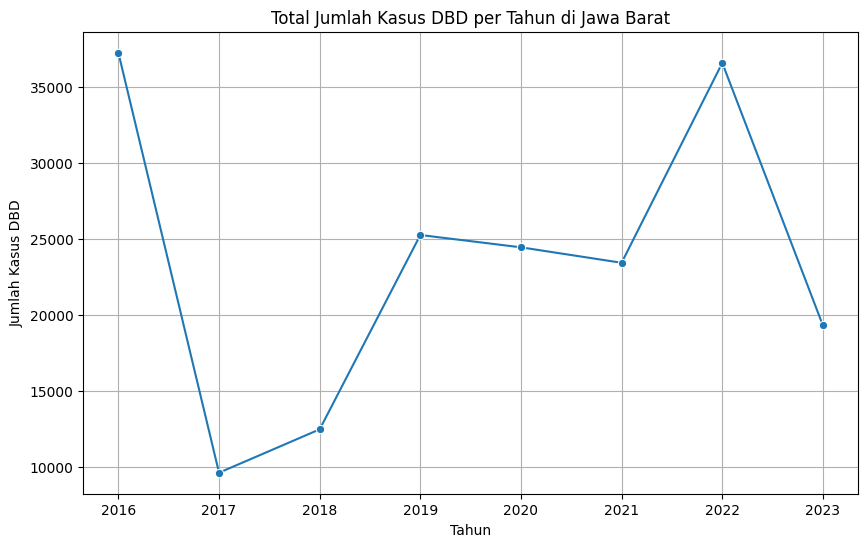

In [66]:
# Menghitung total kasus DBD per tahun
df_total_per_tahun_dbd = df_dbd.groupby('tahun')['jumlah_kasus'].sum().reset_index()
print("Total Jumlah Kasus DBD per Tahun:")
print(df_total_per_tahun_dbd)

# Plot time series total kasus DBD per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total_per_tahun_dbd, x='tahun', y='jumlah_kasus', marker="o")

plt.title('Total Jumlah Kasus DBD per Tahun di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus DBD')
plt.xticks(df_total_per_tahun_dbd['tahun'].unique())  # Menampilkan label tahun
plt.grid(True)
plt.show()

####Kesimpulan
#####Grafik di atas menunjukkan fluktuasi jumlah kasus Demam Berdarah Dengue (DBD) di Jawa Barat dalam kurun waktu 2016 hingga 2023. Terdapat peningkatan signifikan pada kasus DBD tahun 2016, diikuti penurunan drastis pada tahun 2017. Setelah itu, kasus DBD cenderung meningkat kembali hingga mencapai puncaknya pada tahun 2022. Namun, pada tahun 2023 terjadi penurunan yang cukup tajam. Fluktuasi ini mengindikasikan bahwa upaya pengendalian DBD di Jawa Barat belum stabil dan masih memerlukan perhatian serius.




###Studi Kasus  : Jumlah Kasus DBD per 10.000 Penduduk di Setiap Kabupaten/Kota (2020)

Data Gabungan Tahun 2020 untuk DBD:
        nama_kabupaten_kota  jumlah_kasus  Jumlah Penduduk  kasus_per_10k
0           KABUPATEN BOGOR          1296          6088233           2.13
1        KABUPATEN SUKABUMI           561          2470219           2.27
2         KABUPATEN CIANJUR           684          2264328           3.02
3         KABUPATEN BANDUNG          2303          3831505           6.01
4           KABUPATEN GARUT           651          2636637           2.47
5     KABUPATEN TASIKMALAYA           179          1755710           1.02
6          KABUPATEN CIAMIS          1457          1201685          12.12
7        KABUPATEN KUNINGAN           362          1087105           3.33
8         KABUPATEN CIREBON           880          2209633           3.98
9      KABUPATEN MAJALENGKA          1153          1210709           9.52
10       KABUPATEN SUMEDANG           707          1154428           6.12
11      KABUPATEN INDRAMAYU           214          1737624           1.23
12

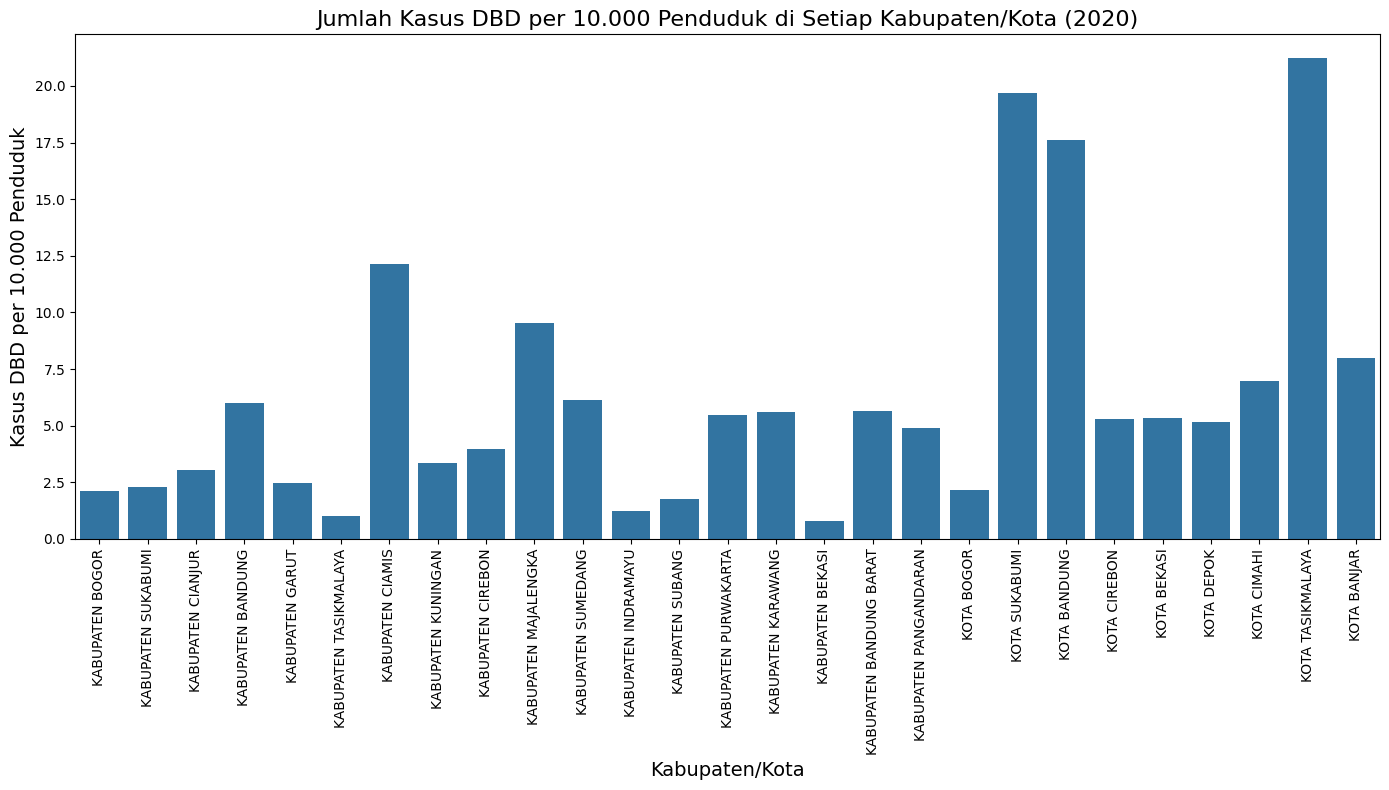

In [68]:
# 1. Filter df_dbd untuk tahun 2020
df_dbd_filtered = df_dbd[df_dbd['tahun'] == 2020]

# 2. Filter df_penduduk untuk tahun 2020
df_penduduk_filtered = df_penduduk[df_penduduk['Tahun'] == 2020]

# 3. Gabungkan df_dbd_filtered dengan df_penduduk_filtered berdasarkan 'nama_kabupaten_kota' dan 'tahun'
df_merged_dbd = pd.merge(df_dbd_filtered, df_penduduk_filtered,
                          left_on=['nama_kabupaten_kota', 'tahun'],
                          right_on=['Wilayah Kab/Kota', 'Tahun'],
                          how='inner')

# 4. Tambahkan kolom untuk normalisasi jumlah kasus DBD per 10.000 penduduk dan bulatkan hasilnya
df_merged_dbd['kasus_per_10k'] = round((df_merged_dbd['jumlah_kasus'] / df_merged_dbd['Jumlah Penduduk']) * 10000, 2)

# 5. Tampilkan hasil untuk memeriksa penggabungan hanya untuk tahun 2020
print("Data Gabungan Tahun 2020 untuk DBD:")
print(df_merged_dbd[['nama_kabupaten_kota', 'jumlah_kasus', 'Jumlah Penduduk', 'kasus_per_10k']])

plt.figure(figsize=(14, 8))
sns.barplot(data=df_merged_dbd, x='nama_kabupaten_kota', y='kasus_per_10k', errorbar=None)

# 7. Tambahkan judul dan label
plt.title('Jumlah Kasus DBD per 10.000 Penduduk di Setiap Kabupaten/Kota (2020)', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Kasus DBD per 10.000 Penduduk', fontsize=14)
plt.xticks(rotation=90)

# 8. Tampilkan plot
plt.tight_layout()
plt.show()


####Kesimpulan
#####Data kasus Demam Berdarah Dengue (DBD) per 10.000 penduduk di Jawa Barat tahun 2020 menunjukkan distribusi yang tidak merata. Beberapa wilayah seperti Kota Tasikmalaya, Kota Sukabumi, dan Kota Bandung mencatat angka kasus yang jauh lebih tinggi dibandingkan daerah lainnya. Hal ini mengindikasikan adanya faktor-faktor tertentu yang berkontribusi terhadap perbedaan tersebut, seperti kepadatan penduduk, kondisi lingkungan, tingkat kesadaran masyarakat, dan kualitas pelayanan kesehatan.

## Studi Kasus  : Jumlah Kasus Diare di Jawa Barat (2016-2023)

### Latar Belakang
##### Diare merupakan salah satu penyakit yang umum terjadi dan dapat disebabkan oleh berbagai faktor, termasuk sanitasi yang buruk, kurangnya akses terhadap air bersih, dan kurangnya pengetahuan tentang kebersihan. Penyakit ini sering kali lebih banyak terjadi di daerah dengan tingkat kemiskinan yang tinggi. Dengan demikian, pemantauan jumlah kasus diare sangat penting untuk merencanakan intervensi kesehatan masyarakat yang tepat.


### Tujuan Analisis:
###### Mengidentifikasi tren jumlah kasus Diare di setiap kabupaten/kota selama periode tersebut.
###### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus Diare dari tahun ke tahun.

###Studi Kasus:Total Jumlah Kasus Diare per Tahun di Jawa Barat

Total Jumlah Kasus Diare per Tahun:
   tahun  jumlah_kasus
0   2016       1032284
1   2017       1028011
2   2018       1468184
3   2019       1331550
4   2020       1305102
5   2021       1353480
6   2022       1367256
7   2023       1346230


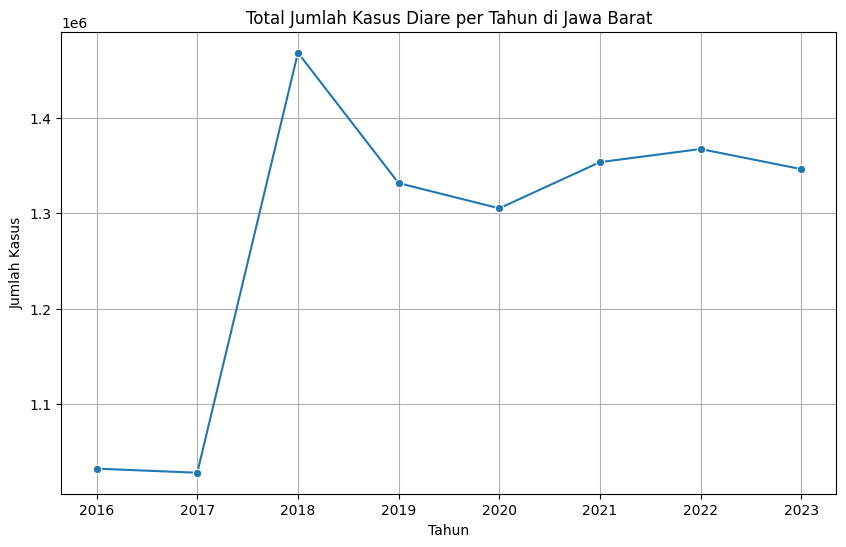

In [69]:
df_total_per_tahun = df_diare.groupby('tahun')['jumlah_kasus'].sum().reset_index()
print("Total Jumlah Kasus Diare per Tahun:")
print(df_total_per_tahun)

# Plot time series total kasus diare per tahun
plt.figure(figsize=(10,6))
sns.lineplot(data=df_total_per_tahun, x='tahun', y='jumlah_kasus', marker="o")

plt.title('Total Jumlah Kasus Diare per Tahun di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.xticks(df_total_per_tahun['tahun'].unique())  # Menampilkan label tahun
plt.grid(True)
plt.show()

####Kesimpulan
#####Plot tersebut menunjukkan bahwa jumlah kasus diare di Jawa Barat mengalami perubahan signifikan dari tahun 2016 hingga 2023. Pada 2018, terjadi lonjakan tajam dalam jumlah kasus, yang mencapai puncaknya sebelum menurun kembali pada 2019. Setelah itu, dari 2020 hingga 2023, jumlah kasus menunjukkan fluktuasi ringan namun cenderung stabil, tanpa perubahan drastis. Hal ini mengindikasikan adanya faktor tertentu yang menyebabkan peningkatan besar pada 2018, diikuti oleh upaya pengendalian yang lebih efektif di tahun-tahun berikutnya, meskipun kasus tetap bertahan pada level yang cukup tinggi.

###Studi Kasus:Jumlah Kasus Diare per 1.000 Penduduk di Setiap Kabupaten/Kota (2020)

Data Gabungan Tahun 2020 (Urut Berdasarkan Kasus Terbanyak):
        nama_kabupaten_kota  jumlah_kasus  Jumlah Penduduk  kasus_per_1k
4           KABUPATEN GARUT        107123          2636637     40.628649
20             KOTA BANDUNG         81327          2510103     32.399866
9      KABUPATEN MAJALENGKA         34880          1210709     28.809565
25         KOTA TASIKMALAYA         18121           663986     27.291238
1        KABUPATEN SUKABUMI         67159          2470219     27.187468
19            KOTA SUKABUMI          8929           330691     27.001037
13     KABUPATEN PURWAKARTA         26242           971889     27.001026
21             KOTA CIREBON          8703           322322     27.000949
24              KOTA CIMAHI         16751           620393     27.000627
10       KABUPATEN SUMEDANG         31170          1154428     27.000385
16  KABUPATEN BANDUNG BARAT         46305          1714982     27.000283
12         KABUPATEN SUBANG         43540          1612576     

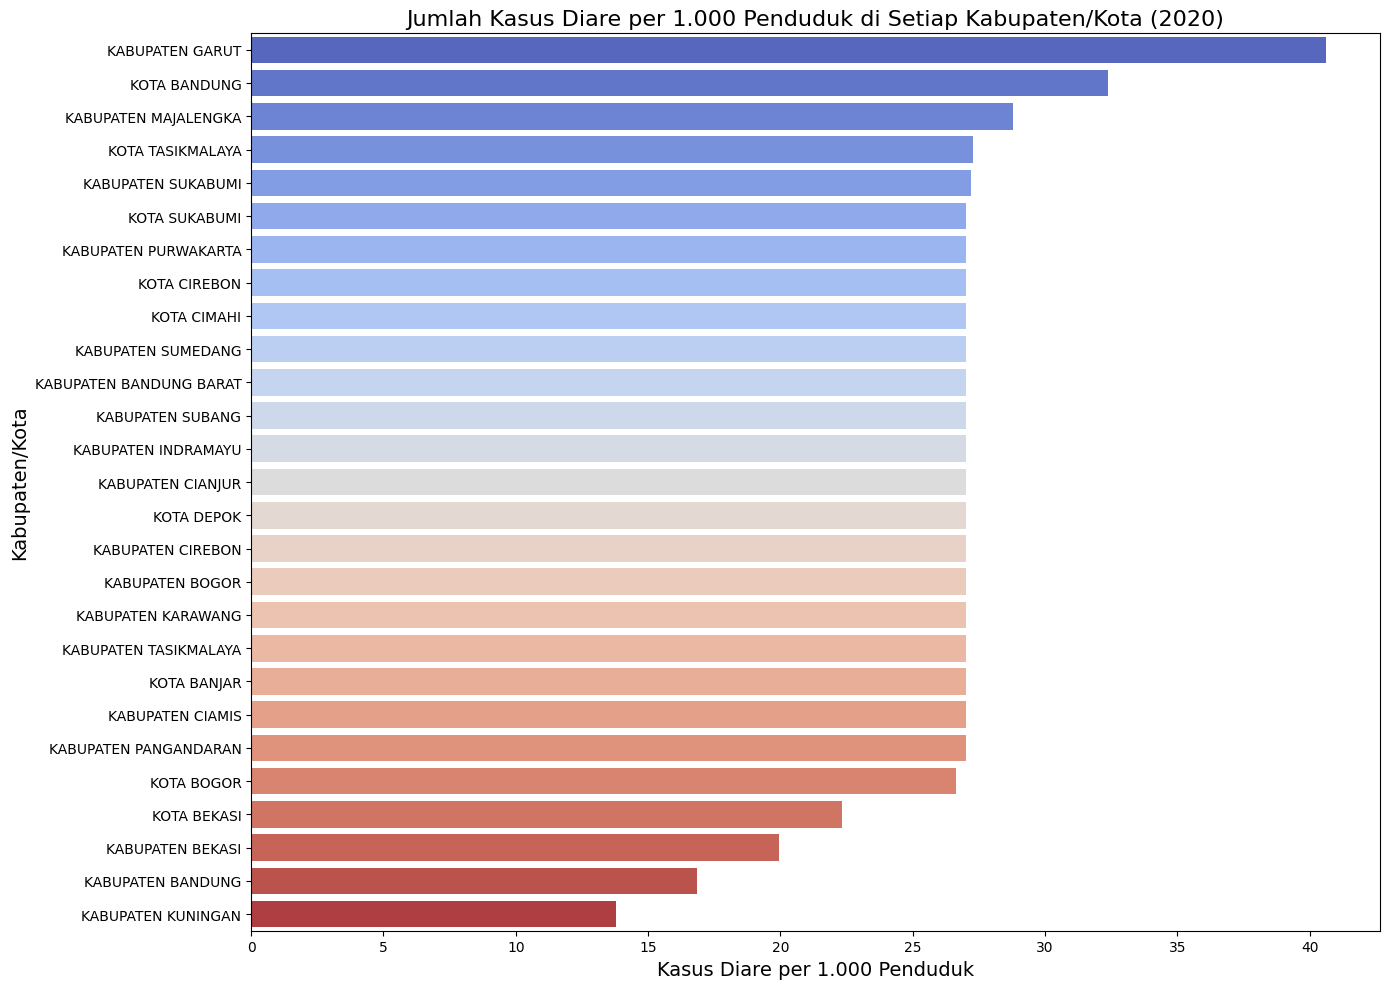

In [85]:
# Filter data untuk tahun 2020 dan gabungkan dengan data penduduk seperti sebelumnya
df_diare_filtered = df_diare[df_diare['tahun'] == 2020]
df_penduduk_filtered = df_penduduk[df_penduduk['Tahun'] == 2020]

df_merged = pd.merge(df_diare_filtered, df_penduduk_filtered,
                     left_on=['nama_kabupaten_kota', 'tahun'],
                     right_on=['Wilayah Kab/Kota', 'Tahun'],
                     how='inner')

df_merged['kasus_per_1k'] = ((df_merged['jumlah_kasus'] / df_merged['Jumlah Penduduk']) * 1000)

# Mengurutkan data berdasarkan jumlah kasus per 1.000 penduduk dari yang terbanyak
df_merged_sorted = df_merged.sort_values(by='kasus_per_1k', ascending=False)

# Menampilkan hasil pengelompokan
print("Data Gabungan Tahun 2020 (Urut Berdasarkan Kasus Terbanyak):")
print(df_merged_sorted[['nama_kabupaten_kota', 'jumlah_kasus', 'Jumlah Penduduk', 'kasus_per_1k']])

# Membuat bar plot dengan orientasi horizontal dan warna yang menarik
plt.figure(figsize=(14, 10))
sns.barplot(data=df_merged_sorted, x='kasus_per_1k', y='nama_kabupaten_kota', palette='coolwarm', hue='nama_kabupaten_kota', dodge=False, legend=False)

# Menambahkan judul dan label
plt.title('Jumlah Kasus Diare per 1.000 Penduduk di Setiap Kabupaten/Kota (2020)', fontsize=16)
plt.xlabel('Kasus Diare per 1.000 Penduduk', fontsize=14)
plt.ylabel('Kabupaten/Kota', fontsize=14)

# Tampilkan plot
plt.tight_layout()
plt.show()

####Kesimpulan
#####Kabupaten Garut menempati posisi teratas dengan jumlah kasus tertinggi per 1.000 penduduk, menunjukkan bahwa wilayah ini menghadapi tantangan serius terkait penyakit diare. Kota Bandung dan Kabupaten Majalengka mengikuti di posisi kedua dan ketiga, yang juga menunjukkan angka kasus yang relatif tinggi.

#####Sebaliknya, daerah seperti Kabupaten Kuningan dan Kabupaten Bandung memiliki jumlah kasus yang lebih rendah, menandakan kemungkinan perbedaan dalam faktor risiko atau efektivitas intervensi kesehatan di sana. Perbedaan ini bisa disebabkan oleh faktor-faktor seperti akses terhadap air bersih, kebiasaan sanitasi, serta kualitas dan cakupan layanan kesehatan.

######Distribusi yang tidak merata ini menunjukkan adanya kebutuhan untuk intervensi yang lebih terfokus dan berbasis lokal, terutama di daerah dengan angka kasus tinggi seperti Garut dan Bandung, guna menurunkan angka kejadian diare dan meningkatkan kesehatan masyarakat secara keseluruhan.

## Studi Kasus: Jumlah Kasus Malaria di Jawa Barat (2016-2023)



### Latar Belakang:
###### Malaria adalah penyakit menular yang disebabkan oleh parasit yang ditularkan melalui gigitan nyamuk Anopheles. Penyakit ini masih menjadi masalah kesehatan masyarakat di banyak daerah, termasuk di Indonesia. Dengan tingkat kemiskinan yang tinggi dan akses terbatas ke layanan kesehatan, masyarakat di daerah tertentu mungkin lebih rentan terhadap malaria. Oleh karena itu, pemantauan jumlah kasus malaria sangat penting untuk perencanaan dan intervensi kesehatan masyarakat yang efektif.



### Tujuan Analisis:
###### Mengidentifikasi tren jumlah kasus Malaria di setiap kabupaten/kota selama periode tersebut.
###### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus Malaria dari tahun ke tahun.

###Studi Kasus  : Total Jumlah Kasus Malaria per Tahun di Jawa Barat

Total Jumlah Kasus Malaria per Tahun:
   tahun  jumlah_kasus
0   2016           250
1   2017           126
2   2018           216
3   2019           233
4   2020           329
5   2021           181
6   2022           498
7   2023           529


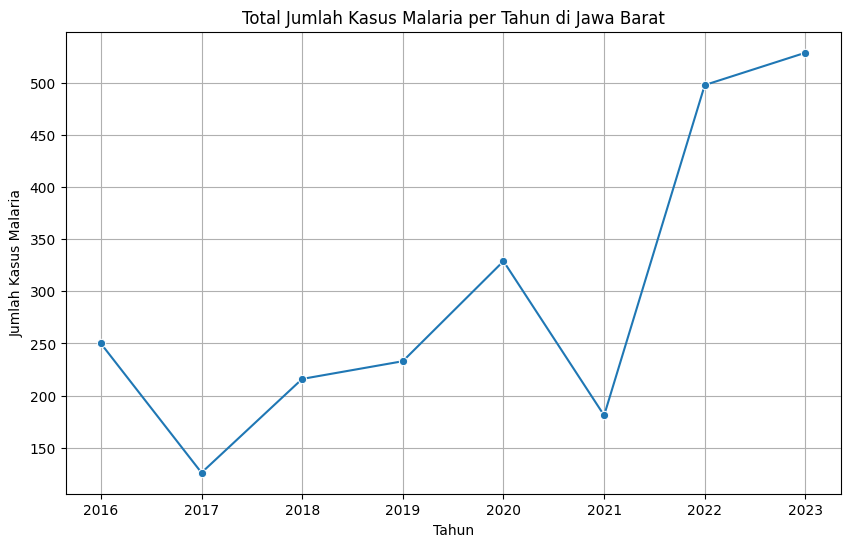

In [71]:
# Menghitung total kasus malaria per tahun
df_total_per_tahun_malaria = df_malaria.groupby('tahun')['jumlah_kasus'].sum().reset_index()
print("Total Jumlah Kasus Malaria per Tahun:")
print(df_total_per_tahun_malaria)

# Plot time series total kasus malaria per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total_per_tahun_malaria, x='tahun', y='jumlah_kasus', marker="o")

plt.title('Total Jumlah Kasus Malaria per Tahun di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Malaria')
plt.xticks(df_total_per_tahun_malaria['tahun'].unique())  # Menampilkan label tahun
plt.grid(True)
plt.show()


####Kesimpulan
#####Grafik di atas menunjukkan fluktuasi jumlah kasus malaria di Jawa Barat dari tahun 2016 hingga 2023. Terjadi penurunan yang cukup signifikan pada tahun 2017, namun kemudian mengalami peningkatan kembali pada tahun 2021 hingga mencapai puncaknya pada tahun 2023. Fluktuasi ini mengindikasikan adanya dinamika dalam upaya pengendalian malaria di Jawa Barat. Data ini menjadi penting sebagai acuan untuk menyusun strategi yang lebih efektif dalam mengatasi permasalahan malaria di Jawa Barat, seperti peningkatan upaya pencegahan, pengobatan, dan surveilans. Secara keseluruhan, grafik ini menunjukkan bahwa meskipun terdapat upaya pengendalian, kasus malaria di Jawa Barat masih menjadi perhatian dan perlu penanganan yang lebih intensif.

###Studi Kasus: Jumlah Kasus Malaria per 10.000 Penduduk di Setiap Kabupaten/Kota (2020)

Data Gabungan Tahun 2020 untuk Malaria:
        nama_kabupaten_kota  jumlah_kasus  Jumlah Penduduk  kasus_per_10k
0           KABUPATEN BOGOR             6          6088233           0.01
1        KABUPATEN SUKABUMI            11          2470219           0.04
2         KABUPATEN CIANJUR             3          2264328           0.01
3         KABUPATEN BANDUNG             2          3831505           0.01
4           KABUPATEN GARUT             3          2636637           0.01
5     KABUPATEN TASIKMALAYA             7          1755710           0.04
6          KABUPATEN CIAMIS             1          1201685           0.01
7        KABUPATEN KUNINGAN             0          1087105           0.00
8         KABUPATEN CIREBON             3          2209633           0.01
9      KABUPATEN MAJALENGKA             0          1210709           0.00
10       KABUPATEN SUMEDANG             0          1154428           0.00
11      KABUPATEN INDRAMAYU            19          1737624           0.1

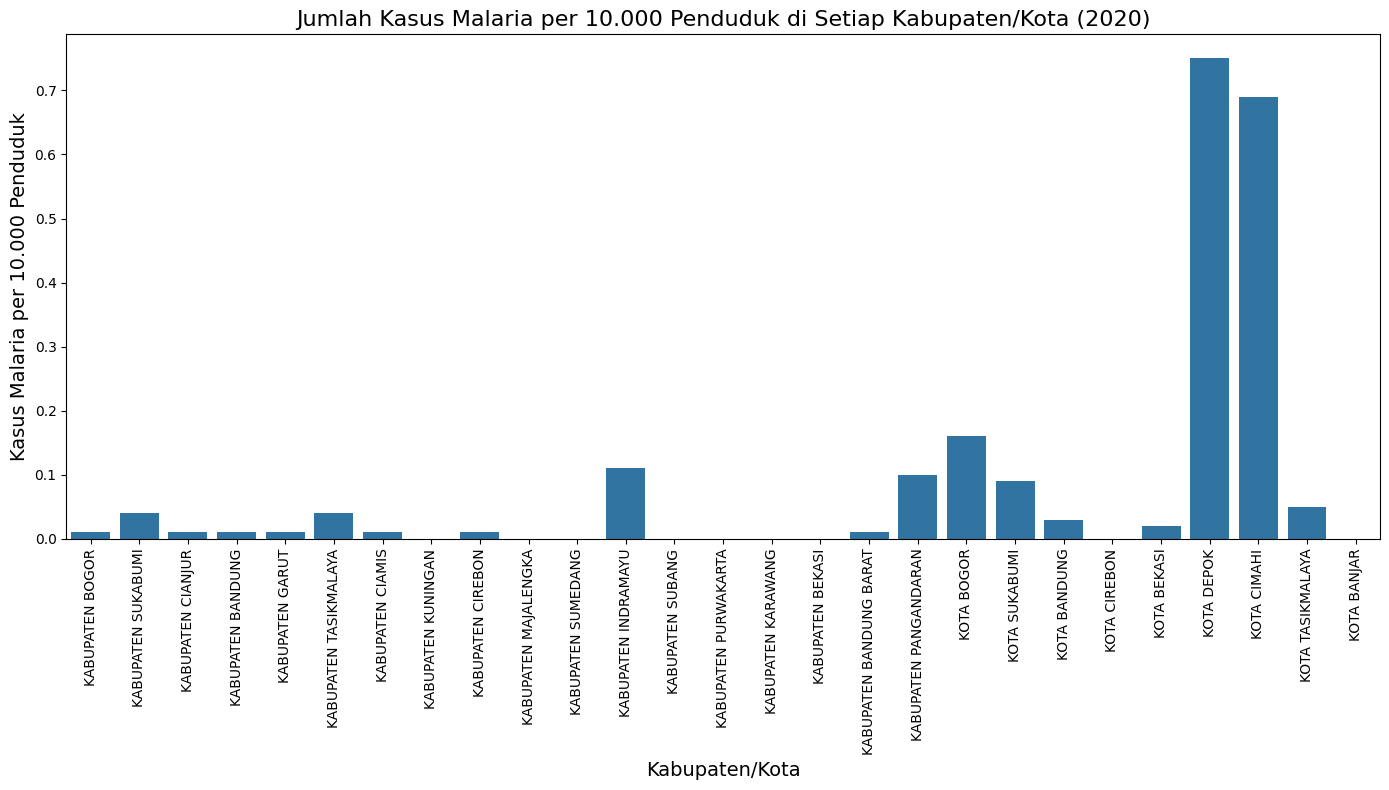

In [73]:
# 1. Filter df_malaria untuk tahun 2020
df_malaria_filtered = df_malaria[df_malaria['tahun'] == 2020]

# 2. Filter df_penduduk untuk tahun 2020
df_penduduk_filtered = df_penduduk[df_penduduk['Tahun'] == 2020]

# 3. Gabungkan df_malaria_filtered dengan df_penduduk_filtered berdasarkan 'nama_kabupaten_kota' dan 'tahun'
df_merged_malaria = pd.merge(df_malaria_filtered, df_penduduk_filtered,
                              left_on=['nama_kabupaten_kota', 'tahun'],
                              right_on=['Wilayah Kab/Kota', 'Tahun'],
                              how='inner')

# 4. Tambahkan kolom untuk normalisasi jumlah kasus malaria per 10.000 penduduk dan bulatkan hasilnya
df_merged_malaria['kasus_per_10k'] = round((df_merged_malaria['jumlah_kasus'] / df_merged_malaria['Jumlah Penduduk']) * 10000, 2)

# 5. Tampilkan hasil untuk memeriksa penggabungan hanya untuk tahun 2020
print("Data Gabungan Tahun 2020 untuk Malaria:")
print(df_merged_malaria[['nama_kabupaten_kota', 'jumlah_kasus', 'Jumlah Penduduk', 'kasus_per_10k']])

# 6. Buat bar plot untuk kasus malaria per 10.000 penduduk di tahun 2020
plt.figure(figsize=(14, 8))
sns.barplot(data=df_merged_malaria, x='nama_kabupaten_kota', y='kasus_per_10k', errorbar=None)

# 7. Tambahkan judul dan label
plt.title('Jumlah Kasus Malaria per 10.000 Penduduk di Setiap Kabupaten/Kota (2020)', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Kasus Malaria per 10.000 Penduduk', fontsize=14)
plt.xticks(rotation=90)

# 8. Tampilkan plot
plt.tight_layout()
plt.show()

####Kesimpulan
#####Grafik di atas menunjukkan jumlah kasus malaria per 10.000 penduduk di setiap kabupaten/kota di Jawa Barat pada tahun 2020. Terdapat perbedaan yang sangat signifikan antara satu daerah dengan daerah lainnya. Beberapa kabupaten/kota memiliki jumlah kasus malaria yang sangat rendah, mendekati nol, sementara beberapa lainnya memiliki angka yang cukup tinggi seperti Kota Depok dan Kota Cimahi. Ini menunjukkan bahwa penyebaran malaria di Jawa Barat sangat tidak merata dan terkonsentrasi di beberapa wilayah tertentu. Data ini sangat penting untuk membantu pemerintah dan pihak terkait dalam merancang strategi pengendalian malaria yang lebih efektif dan tertarget, sehingga dapat menekan angka kasus malaria di Jawa Barat.



## Studi Kasus: Tren Jumlah Kasus Diare, DBD, dan Malaria di Jawa Barat

### Latar Belakang:
##### Penyakit menular seperti diare, malaria, dan Demam Berdarah Dengue (DBD) tetap menjadi masalah kesehatan masyarakat di Indonesia, termasuk di provinsi Jawa Barat. Penyakit ini dapat memengaruhi kualitas hidup dan produktivitas masyarakat. Dengan adanya faktor risiko seperti sanitasi yang buruk dan akses terbatas ke layanan kesehatan, pemantauan jumlah kasus penyakit ini sangat penting untuk perencanaan intervensi yang efektif.

### Tujuan Analisis:
##### Mengidentifikasi tren jumlah kasus untuk masing-masing penyakit selama periode tersebut.
##### Menganalisis perbandingan jumlah kasus antara ketiga penyakit di berbagai kabupaten/kota.
##### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus dari tahun ke tahun.

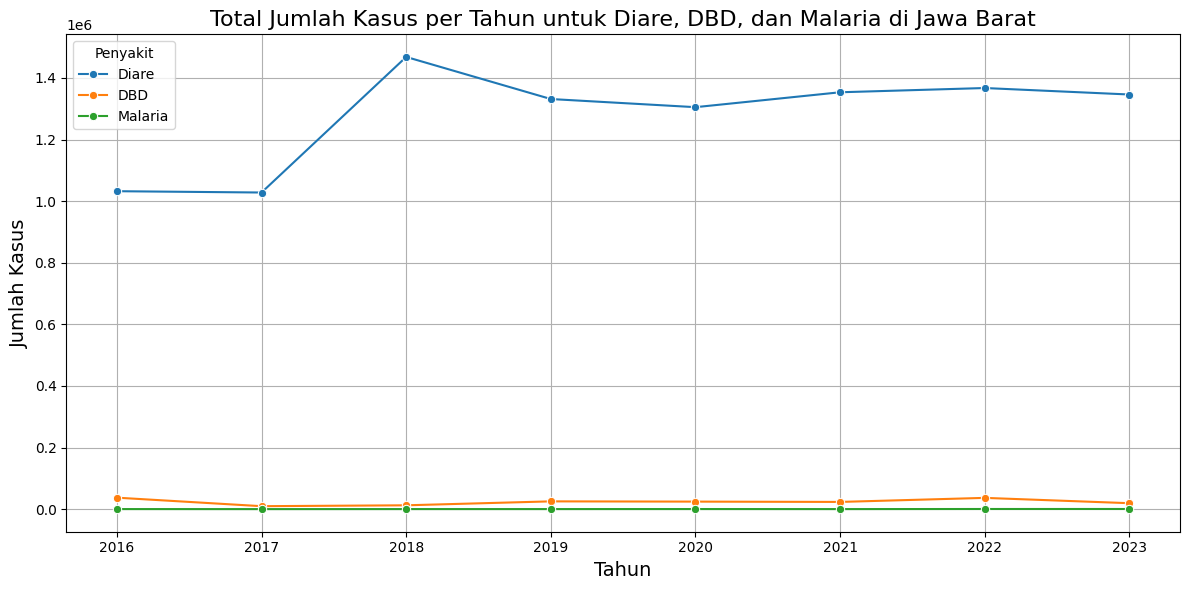

In [74]:
total_diare = df_diare.groupby('tahun')['jumlah_kasus'].sum().reset_index()
total_dbd = df_dbd.groupby('tahun')['jumlah_kasus'].sum().reset_index()
total_malaria = df_malaria.groupby('tahun')['jumlah_kasus'].sum().reset_index()

# Menggabungkan data total kasus ke dalam satu DataFrame
total_kasus = pd.merge(total_diare, total_dbd, on='tahun', suffixes=('_diare', '_dbd'))
total_kasus = pd.merge(total_kasus, total_malaria, on='tahun')
total_kasus.rename(columns={'jumlah_kasus': 'jumlah_kasus_malaria'}, inplace=True)

# Plot time series untuk ketiga penyakit
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_kasus, x='tahun', y='jumlah_kasus_diare', marker="o", label='Diare')
sns.lineplot(data=total_kasus, x='tahun', y='jumlah_kasus_dbd', marker="o", label='DBD')
sns.lineplot(data=total_kasus, x='tahun', y='jumlah_kasus_malaria', marker="o", label='Malaria')

# Menambahkan judul dan label
plt.title('Total Jumlah Kasus per Tahun untuk Diare, DBD, dan Malaria di Jawa Barat', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.xticks(total_kasus['tahun'].unique())  # Menampilkan label tahun
plt.legend(title='Penyakit')
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()


###Kesimpulan
#####Grafik di atas menunjukkan jumlah kasus diare, DBD, dan malaria di Jawa Barat dari tahun 2016 hingga 2023. Terlihat bahwa jumlah kasus diare mengalami peningkatan yang signifikan pada tahun 2018, lalu cenderung stabil hingga tahun 2023. Sementara itu, kasus DBD dan malaria cenderung fluktuatif dengan jumlah yang relatif lebih sedikit dibandingkan dengan diare. Dari grafik ini dapat disimpulkan bahwa diare merupakan masalah kesehatan yang lebih dominan di Jawa Barat dibandingkan dengan DBD dan malaria dalam periode tersebut.

## Studi Kasus: Tren indeks kesehatan dengan presentase kemiskinan (2017-2022)

###Latar Belakang:
#####Kesehatan masyarakat dan kemiskinan saling berhubungan dan mempengaruhi pembangunan sosial dan ekonomi suatu negara. Indeks kesehatan mencerminkan kondisi kesehatan, sementara kemiskinan menunjukkan keadaan ekonomi. Negara dengan tingkat kemiskinan tinggi sering kali menghadapi masalah kesehatan yang lebih besar. Oleh karena itu, analisis tren indeks kesehatan dan persentase kemiskinan dari tahun 2017 hingga 2022 penting untuk memahami hubungan ini.

###Tujuan Analisis:
#####Mengidentifikasi tren perubahan indeks kesehatan di berbagai daerah selama periode 2017 hingga 2022.
#####Menganalisis perbandingan persentase kemiskinan antara berbagai daerah dan bagaimana hal ini berkaitan dengan indeks kesehatan.
#####Mengetahui apakah terdapat perbedaan signifikan dalam indeks kesehatan dan persentase kemiskinan dari tahun ke tahun.

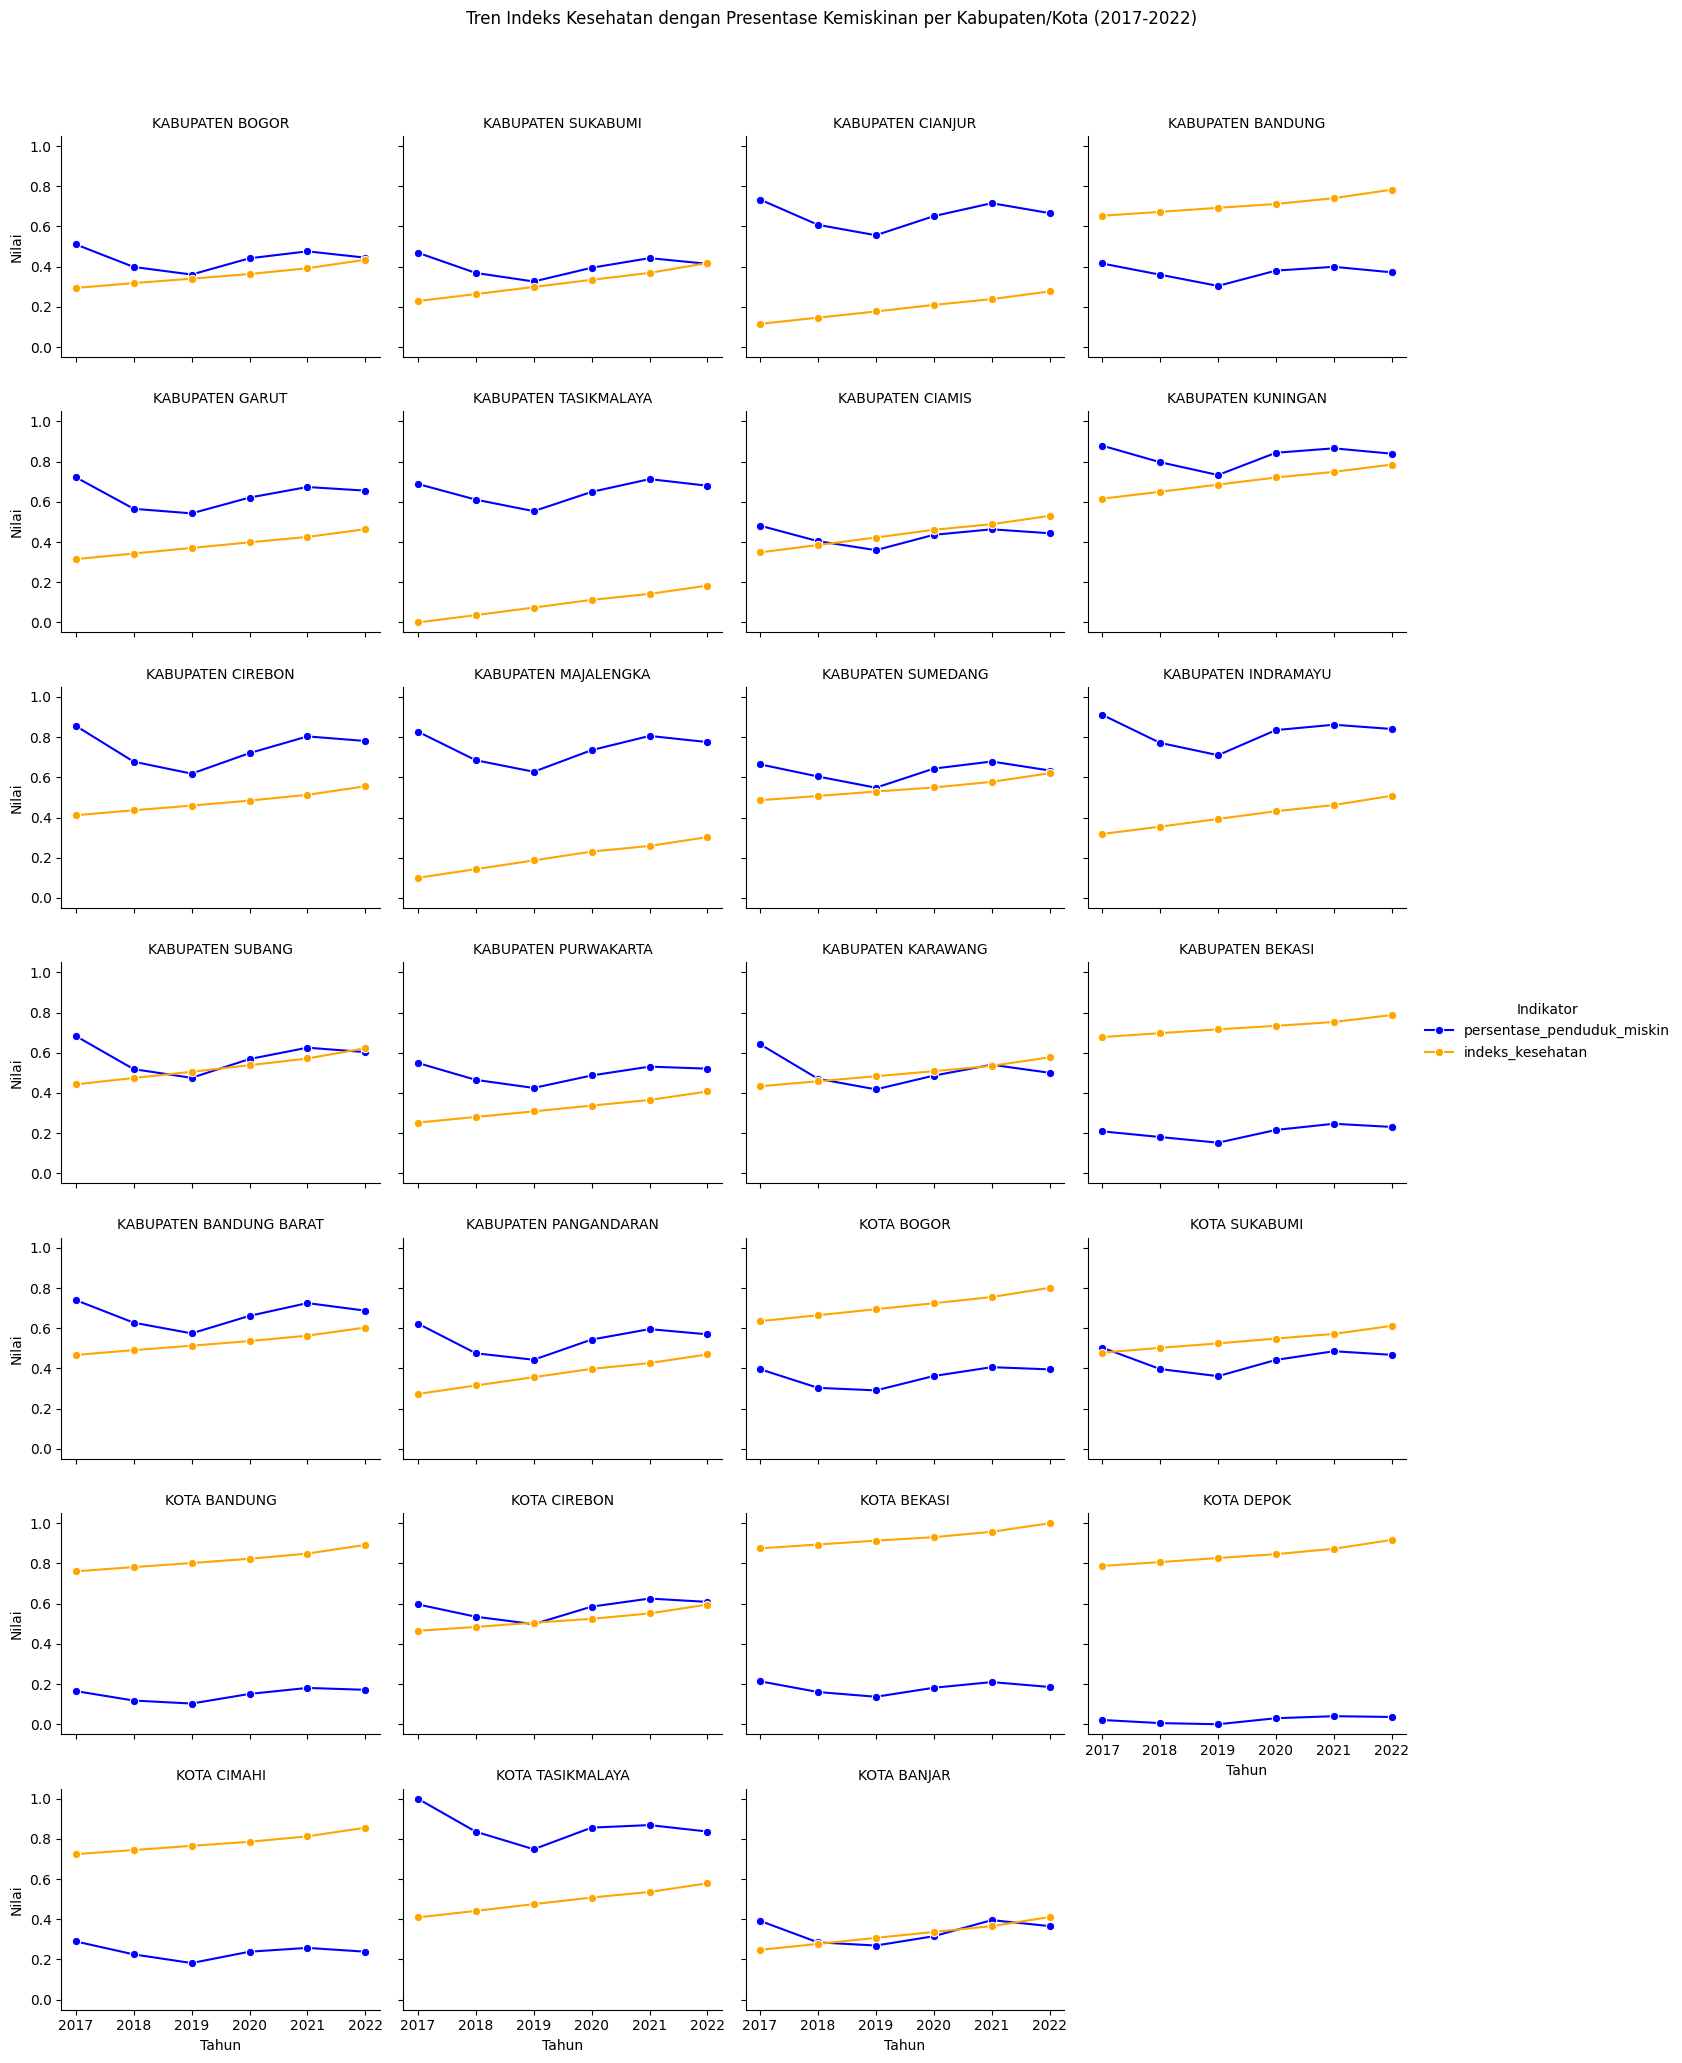

In [75]:
# Filter columns and merge data
df_penduduk_miskin = df_penduduk_miskin[['tahun', 'nama_kabupaten_kota', 'persentase_penduduk_miskin']]
df_kesehatan = df_indeks_kesehatan[['tahun', 'nama_kabupaten_kota', 'indeks_kesehatan']]
data = pd.merge(df_penduduk_miskin, df_kesehatan, on=['tahun', 'nama_kabupaten_kota'])

# Normalization for each column
data['persentase_penduduk_miskin'] = (data['persentase_penduduk_miskin'] - data['persentase_penduduk_miskin'].min()) / (data['persentase_penduduk_miskin'].max() - data['persentase_penduduk_miskin'].min())
data['indeks_kesehatan'] = (data['indeks_kesehatan'] - data['indeks_kesehatan'].min()) / (data['indeks_kesehatan'].max() - data['indeks_kesehatan'].min())

# Reshape data for plotting
data_melted = data.melt(id_vars=["tahun", "nama_kabupaten_kota"],
                        value_vars=["persentase_penduduk_miskin", "indeks_kesehatan"],
                        var_name="Indikator", value_name="Nilai")

# Define custom color palette for indicators
palette = {"persentase_penduduk_miskin": "blue", "indeks_kesehatan": "orange"}

# Plot with FacetGrid using custom colors and hue
g = sns.FacetGrid(data_melted, col="nama_kabupaten_kota", col_wrap=4, height=3, aspect=1.2, hue="Indikator", palette=palette)
g.map(sns.lineplot, "tahun", "Nilai", marker="o")
g.add_legend(title="Indikator")

# Customize labels and titles
g.set_axis_labels("Tahun")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Tren Indeks Kesehatan dengan Presentase Kemiskinan per Kabupaten/Kota (2017-2022)")

plt.show()

###Kesimpulan
#####Grafik tersebut menunjukkan adanya perbedaan yang cukup signifikan dalam tingkat kesehatan masyarakat di berbagai kabupaten/kota di Jawa Barat. Secara umum, kabupaten dengan tingkat kemiskinan yang lebih tinggi cenderung memiliki indeks kesehatan yang lebih rendah. Namun, perlu diingat bahwa ini bukan satu-satunya faktor yang mempengaruhi kesehatan. Faktor lain seperti akses terhadap layanan kesehatan, dan kondisi lingkungan juga berperan penting. Fluktuasi indeks kesehatan dari tahun ke tahun menunjukkan bahwa kondisi kesehatan masyarakat terus berubah dan dipengaruhi oleh berbagai kebijakan dan program yang diterapkan. Data ini sangat berguna untuk merancang strategi yang lebih efektif dalam meningkatkan kesehatan masyarakat di Jawa Barat, terutama di daerah-daerah yang masih menghadapi tantangan.

##Studi Kasus: Hubungan Antara Jumlah Kematian Dan Juga Fasilitas Kesehatan Mencakup Jumlah Rumah Sakit Dan Tenaga Kesehatan di Tahun 2019

###Latar Belakang:
#####Jumlah kematian di suatu daerah dapat dipengaruhi oleh berbagai faktor, salah satunya adalah ketersediaan fasilitas kesehatan, termasuk jumlah rumah sakit dan tenaga kesehatan. Fasilitas kesehatan yang memadai berperan penting dalam memberikan pelayanan kesehatan yang baik, sehingga dapat menurunkan angka kematian. Oleh karena itu, penting untuk menganalisis hubungan antara jumlah kematian dan fasilitas kesehatan di tahun 2019 untuk memahami dampak ketersediaan layanan kesehatan terhadap angka kematian.


###Tujuan Analisis:
#####Menganalisis hubungan antara jumlah kematian dan ketersediaan fasilitas kesehatan, termasuk jumlah rumah sakit dan tenaga kesehatan, di tahun 2019.
#####Menganalisis perbandingan angka kematian di daerah dengan fasilitas kesehatan yang berbeda.
#####Menyusun rekomendasi untuk meningkatkan fasilitas kesehatan berdasarkan hasil analisis untuk menurunkan angka kematian.


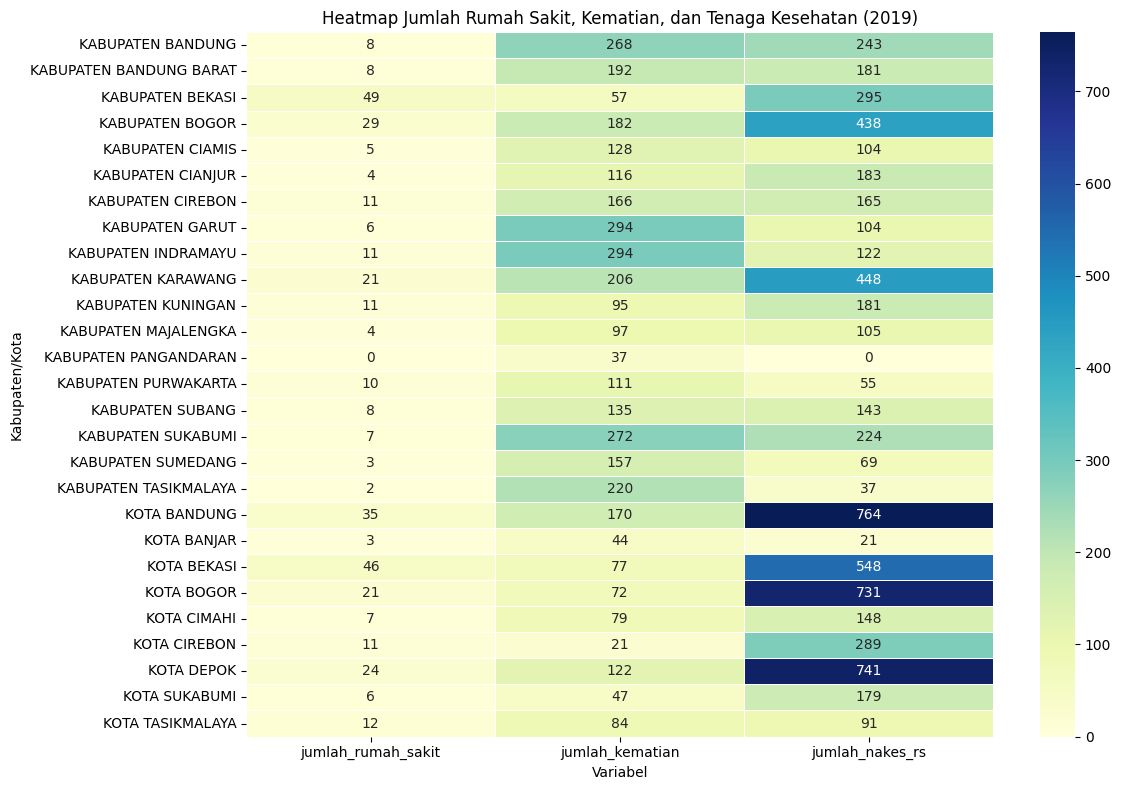

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk tahun 2019
df_rumah_sakit_2019 = df_rumah_sakit[df_rumah_sakit['tahun'] == 2019]
df_kematian_2019 = df_kematian[df_kematian['tahun'] == 2019]
df_nakes_2019 = df_tenaga_kesehatan[df_tenaga_kesehatan['tahun'] == 2019]

# Hitung jumlah rumah sakit, kematian, dan tenaga kesehatan per kabupaten/kota
df_rs_count = df_rumah_sakit_2019.groupby('nama_kabupaten_kota').size().reset_index(name='jumlah_rumah_sakit')
df_kematian_sum = df_kematian_2019.groupby('nama_kabupaten_kota')['jumlah_kematian'].sum().reset_index()
df_nakes_sum = df_nakes_2019.groupby('nama_kabupaten_kota')['jumlah_nakes_rs'].sum().reset_index()

# Gabungkan data menggunakan pd.merge dengan how='outer' untuk menghindari kehilangan data
df_merged = pd.merge(df_rs_count, df_kematian_sum, on='nama_kabupaten_kota', how='outer')
df_merged = pd.merge(df_merged, df_nakes_sum, on='nama_kabupaten_kota', how='outer')

# Isi nilai NaN dengan 0 jika ada
df_merged.fillna(0, inplace=True)

# Atur index dan buat heatmap
df_heatmap = df_merged.set_index('nama_kabupaten_kota')[[ 'jumlah_rumah_sakit', 'jumlah_kematian', 'jumlah_nakes_rs']]


# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap Jumlah Rumah Sakit, Kematian, dan Tenaga Kesehatan (2019)')
plt.xlabel('Variabel')
plt.ylabel('Kabupaten/Kota')
plt.tight_layout()
plt.show()

###Kesimpulan
#####Heatmap menunjukkan ketidakmerataan akses layanan kesehatan di Jawa Barat tahun 2019. Daerah perkotaan umumnya memiliki fasilitas kesehatan yang lebih baik dibandingkan daerah pedesaan. Jumlah rumah sakit dan tenaga kesehatan yang lebih tinggi di suatu daerah tidak selalu menjamin tingkat kesehatan yang lebih baik, karena faktor lain seperti kepadatan penduduk dan kondisi sosial ekonomi juga berperan. Data ini penting untuk merencanakan pembangunan kesehatan yang lebih merata.

##Studi Kasus: Jumlah Kasus HIV di Jawa Barat (2018-2023)

###Latar Belakang
Jawa Barat, provinsi terpadat di Indonesia, menghadapi tantangan serius dalam penanganan epidemi HIV/AIDS, terutama di kalangan populasi rentan. Meskipun program pencegahan dan pengobatan telah diterapkan, angka infeksi HIV tetap mengkhawatirkan, terutama setelah dampak pandemi COVID-19 yang memengaruhi akses layanan kesehatan. Studi ini bertujuan menganalisis tren kasus HIV di Jawa Barat dari tahun 2018 hingga 2023, serta mengeksplorasi faktor-faktor seperti kebijakan kesehatan dan stigma sosial yang memengaruhi penyebaran virus. Hasil analisis diharapkan dapat memberikan strategi efektif untuk pencegahan dan pengobatan, serta kontribusi pada kebijakan kesehatan masyarakat yang berbasis bukti.


### Tujuan Analisis:
###### Mengidentifikasi tren jumlah kasus HIV di setiap kabupaten/kota selama periode tersebut.
###### Mengetahui apakah terdapat perbedaan signifikan dalam jumlah kasus HIV dari tahun ke tahun.

###Studi Kasus  : Total Jumlah Kasus HIV per Tahun di Jawa Barat

Total Jumlah Kasus HIV per Tahun:
   tahun  jumlah_kasus
0   2018          5275
1   2019          4537
2   2020          4758
3   2021          4531
4   2022          8812
5   2023          9710


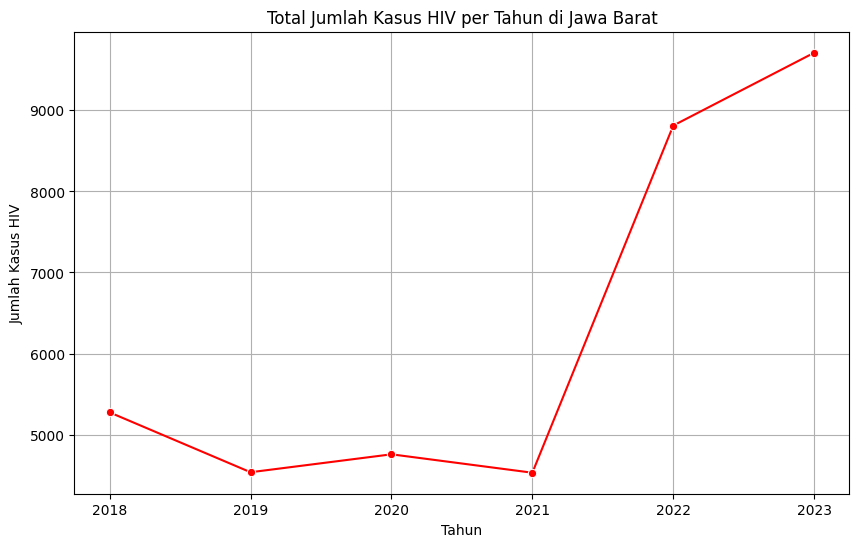

In [77]:
# Menghitung total kasus HIV per tahun
df_total_per_tahun_hiv = df_HIV.groupby('tahun')['jumlah_kasus'].sum().reset_index()
print("Total Jumlah Kasus HIV per Tahun:")
print(df_total_per_tahun_hiv)

# Plot time series total kasus HIV per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total_per_tahun_hiv, x='tahun', y='jumlah_kasus', marker="o", color='red')

plt.title('Total Jumlah Kasus HIV per Tahun di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus HIV')
plt.xticks(df_total_per_tahun_hiv['tahun'].unique())  # Menampilkan label tahun
plt.grid(True)
plt.show()


####Kesimpulan
#####Grafik di atas menunjukkan tren peningkatan jumlah kasus HIV di Jawa Barat dari tahun 2018 hingga 2023. Terjadi penurunan yang cukup signifikan pada tahun 2019, namun kemudian diikuti dengan peningkatan yang tajam dimulai pada tahun 2021 hingga tahun-tahun berikutnya, mencapai puncaknya pada tahun 2023. Peningkatan kasus HIV ini mengindikasikan adanya tantangan dalam upaya pencegahan dan pengendalian HIV di Jawa Barat. Beberapa faktor yang mungkin berkontribusi terhadap peningkatan ini antara lain perubahan perilaku seksual, penggunaan jarum suntik yang tidak steril, dan kurangnya kesadaran masyarakat tentang pencegahan HIV. Data ini menjadi penting sebagai acuan untuk menyusun strategi yang lebih efektif dalam mengatasi permasalahan HIV di Jawa Barat, seperti peningkatan kampanye sosialisasi, penyediaan layanan tes HIV yang mudah diakses, serta pengobatan yang lebih komprehensif.

###Studi Kasus: Jumlah Kasus HIV per 10.000 Penduduk di Setiap Kabupaten/Kota (2023)

Data Gabungan Tahun 2023 untuk HIV:
        nama_kabupaten_kota  jumlah_kasus  Jumlah Penduduk  kasus_per_10k
0           KABUPATEN BOGOR           830          5627020           1.48
1        KABUPATEN SUKABUMI           294          2802400           1.05
2         KABUPATEN CIANJUR           211          2558140           0.82
3         KABUPATEN BANDUNG           534          3721110           1.44
4           KABUPATEN GARUT           251          2683670           0.94
5     KABUPATEN TASIKMALAYA            89          1907050           0.47
6          KABUPATEN CIAMIS           112          1251540           0.89
7        KABUPATEN KUNINGAN           165          1201760           1.37
8         KABUPATEN CIREBON           364          2360440           1.54
9      KABUPATEN MAJALENGKA           259          1340620           1.93
10       KABUPATEN SUMEDANG           123          1178240           1.04
11      KABUPATEN INDRAMAYU           573          1894330           3.02
12

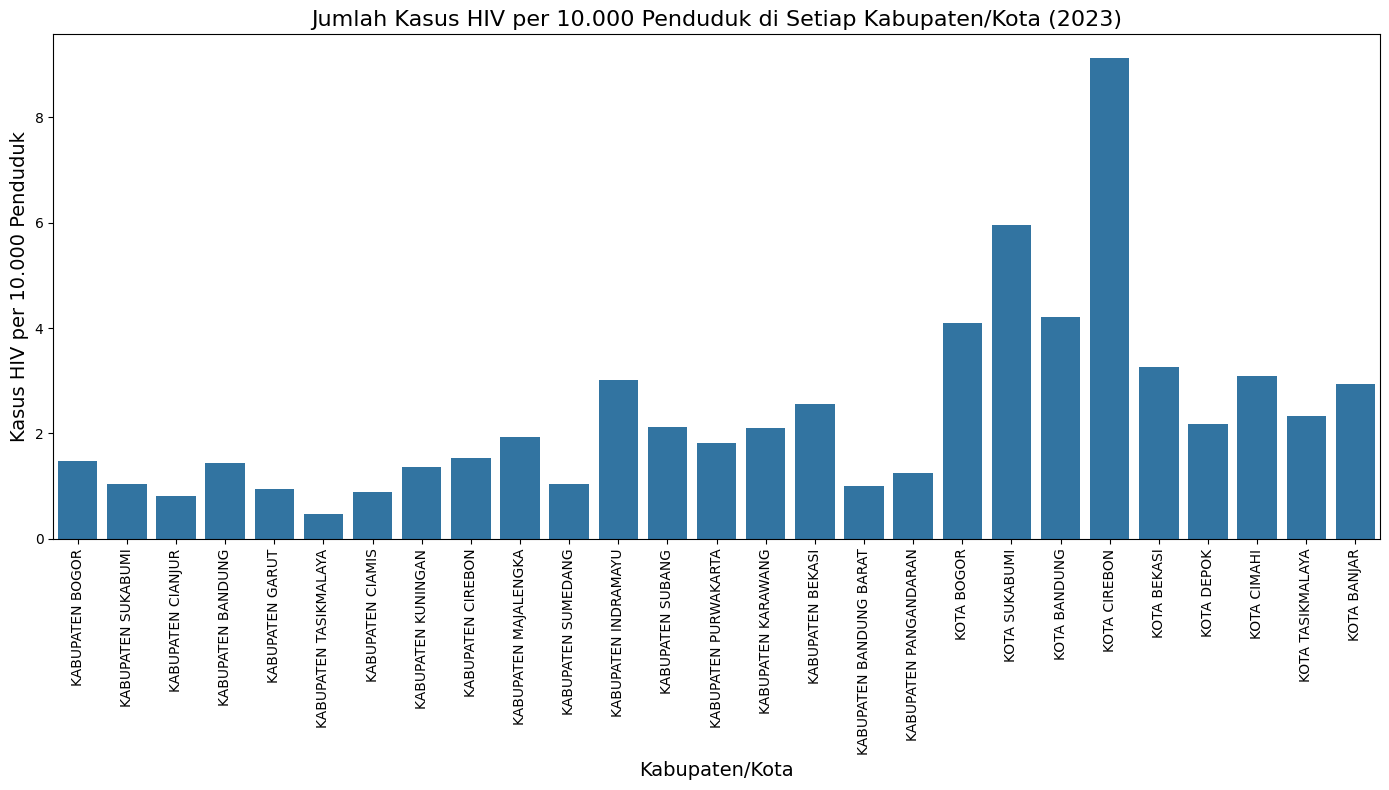

In [78]:
# 1. Filter df_hiv untuk tahun 2020
df_hiv_filtered = df_HIV[df_HIV['tahun'] == 2023]

# 2. Filter df_penduduk2023 untuk tahun 2023
df_penduduk_filtered = df_penduduk2023[df_penduduk2023['Tahun'] == 2023]

# 3. Gabungkan df_hiv_filtered dengan df_penduduk_filtered berdasarkan 'nama_kabupaten_kota' dan 'tahun'
df_merged_hiv = pd.merge(df_hiv_filtered, df_penduduk_filtered,
                          left_on=['nama_kabupaten_kota', 'tahun'],
                          right_on=['Wilayah Kab/Kota', 'Tahun'],
                          how='inner')

# 4. Tambahkan kolom untuk normalisasi jumlah kasus HIV per 10.000 penduduk dan bulatkan hasilnya
df_merged_hiv['kasus_per_10k'] = round((df_merged_hiv['jumlah_kasus'] / df_merged_hiv['Jumlah Penduduk']) * 10000, 2)

# 5. Tampilkan hasil untuk memeriksa penggabungan hanya untuk tahun 2023
print("Data Gabungan Tahun 2023 untuk HIV:")
print(df_merged_hiv[['nama_kabupaten_kota', 'jumlah_kasus', 'Jumlah Penduduk', 'kasus_per_10k']])

# 6. Buat bar plot untuk kasus HIV per 10.000 penduduk di tahun 2023
plt.figure(figsize=(14, 8))
sns.barplot(data=df_merged_hiv, x='nama_kabupaten_kota', y='kasus_per_10k', errorbar=None)

# 7. Tambahkan judul dan label
plt.title('Jumlah Kasus HIV per 10.000 Penduduk di Setiap Kabupaten/Kota (2023)', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Kasus HIV per 10.000 Penduduk', fontsize=14)
plt.xticks(rotation=90)

# 8. Tampilkan plot
plt.tight_layout()
plt.show()


####Kesimpulan
#####Grafik di atas menunjukkan jumlah kasus HIV per 10.000 penduduk di setiap kabupaten/kota di Jawa Barat pada tahun 2023. Terdapat perbedaan yang cukup signifikan antara satu daerah dengan daerah lainnya. Beberapa kabupaten/kota memiliki jumlah kasus HIV yang relatif tinggi, sementara yang lainnya lebih rendah. Ini mengindikasikan bahwa penyebaran HIV di Jawa Barat tidak merata dan terdapat beberapa daerah yang menjadi perhatian khusus. Data ini sangat penting untuk membantu pemerintah dan pihak terkait dalam merancang strategi pencegahan dan penanganan HIV yang lebih efektif dan tertarget, sehingga dapat menekan laju penyebaran HIV di Jawa Barat.

##Studi Kasus  : Indeks Kesehatan Di Jawa Barat (2010 - 2022)

###Latar Belakang:
#####Indeks kesehatan di suatu wilayah mencerminkan kondisi kesehatan masyarakat dan kualitas layanan kesehatan yang tersedia. Di Jawa Barat, perubahan dalam indeks kesehatan antara tahun 2010 hingga 2022 dapat dipengaruhi oleh berbagai faktor, termasuk kebijakan kesehatan, akses terhadap layanan, serta kondisi sosial dan ekonomi. Memahami tren indeks kesehatan selama periode ini penting untuk mengevaluasi efektivitas program kesehatan yang telah dilaksanakan dan untuk merumuskan strategi perbaikan ke depan.

###Tujaun Analisis:
#####Menganalisis perbandingan indeks kesehatan antar kabupaten/kota di Jawa Barat selama periode 2010 hingga 2022 untuk mengidentifikasi wilayah dengan kinerja kesehatan yang baik dan buruk.

Rata-rata Indeks Kesehatan per Tahun:
    tahun  indeks_kesehatan
0    2010         75.825926
1    2011         75.909259
2    2012         75.989630
3    2013         78.901852
4    2014         78.942222
5    2015         79.247037
6    2016         79.370000
7    2017         79.495556
8    2018         79.786667
9    2019         80.078519
10   2020         80.371481
11   2021         80.662963
12   2022         81.106667


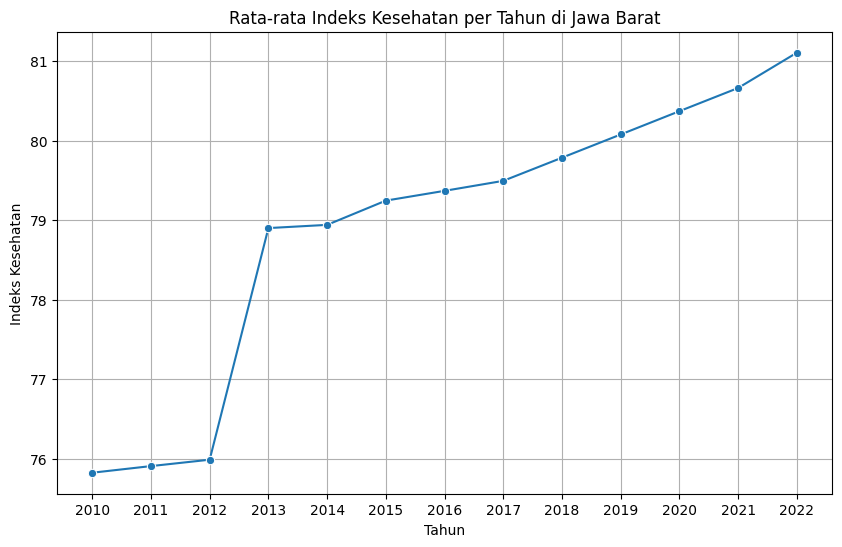

In [79]:
df_rata_rata_indeks_kesehatan_per_tahun = df_indeks_kesehatan.groupby('tahun')['indeks_kesehatan'].mean().reset_index()
print("Rata-rata Indeks Kesehatan per Tahun:")
print(df_rata_rata_indeks_kesehatan_per_tahun)

# Plot time series rata-rata indeks kesehatan per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rata_rata_indeks_kesehatan_per_tahun, x='tahun', y='indeks_kesehatan', marker="o")

# Tambahkan judul dan label
plt.title('Rata-rata Indeks Kesehatan per Tahun di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Indeks Kesehatan')
plt.xticks(df_rata_rata_indeks_kesehatan_per_tahun['tahun'].unique())  # Menampilkan label tahun
plt.grid(True)

# Tampilkan plot
plt.show()

###Kesimpulan
#####Berdasarkan grafik yang ditampilkan, dapat disimpulkan bahwa indeks kesehatan masyarakat Jawa Barat mengalami peningkatan yang cukup signifikan dari tahun 2010 hingga 2022. Ini mengindikasikan adanya perbaikan umum dalam kondisi kesehatan masyarakat di wilayah tersebut. Peningkatan ini kemungkinan besar dipengaruhi oleh berbagai faktor, seperti peningkatan akses terhadap layanan kesehatan, perbaikan kualitas gizi, dan keberhasilan program-program kesehatan yang telah dilaksanakan.

##Studi Kasus  : Jumlah Rumah Sakit Per Kab/Kota Di Jawa Barat 2023

###Latar Belakang:
#####Jumlah rumah sakit per kabupaten/kota di Jawa Barat merupakan indikator penting dalam menilai aksesibilitas dan ketersediaan layanan kesehatan bagi masyarakat. Dengan pertumbuhan populasi yang pesat dan meningkatnya kebutuhan layanan kesehatan, distribusi rumah sakit yang merata menjadi krusial untuk memastikan setiap warga mendapatkan perawatan yang memadai. Analisis mengenai jumlah rumah sakit per kabupaten/kota di tahun 2023 dapat memberikan wawasan tentang kesenjangan dalam layanan kesehatan dan membantu pemerintah serta pemangku kepentingan dalam merumuskan kebijakan yang lebih efektif untuk meningkatkan kesehatan masyarakat

###Tujuan Analisis:
#####Menganalisis distribusi jumlah rumah sakit per kabupaten/kota di Jawa Barat pada tahun 2023 untuk memahami keterjangkauan layanan kesehatan.

Jumlah Rumah Sakit Umum di Jawa Barat Tahun 2023:
        nama_kabupaten_kota  jumlah_rumah_sakit_umum
0         KABUPATEN BANDUNG                       11
1   KABUPATEN BANDUNG BARAT                        6
2          KABUPATEN BEKASI                       49
3           KABUPATEN BOGOR                       26
4          KABUPATEN CIAMIS                        5
5         KABUPATEN CIANJUR                        5
6         KABUPATEN CIREBON                       10
7           KABUPATEN GARUT                        7
8       KABUPATEN INDRAMAYU                       11
9        KABUPATEN KARAWANG                       22
10       KABUPATEN KUNINGAN                       11
11     KABUPATEN MAJALENGKA                        3
12    KABUPATEN PANGANDARAN                        1
13     KABUPATEN PURWAKARTA                        9
14         KABUPATEN SUBANG                        9
15       KABUPATEN SUKABUMI                        9
16       KABUPATEN SUMEDANG                      

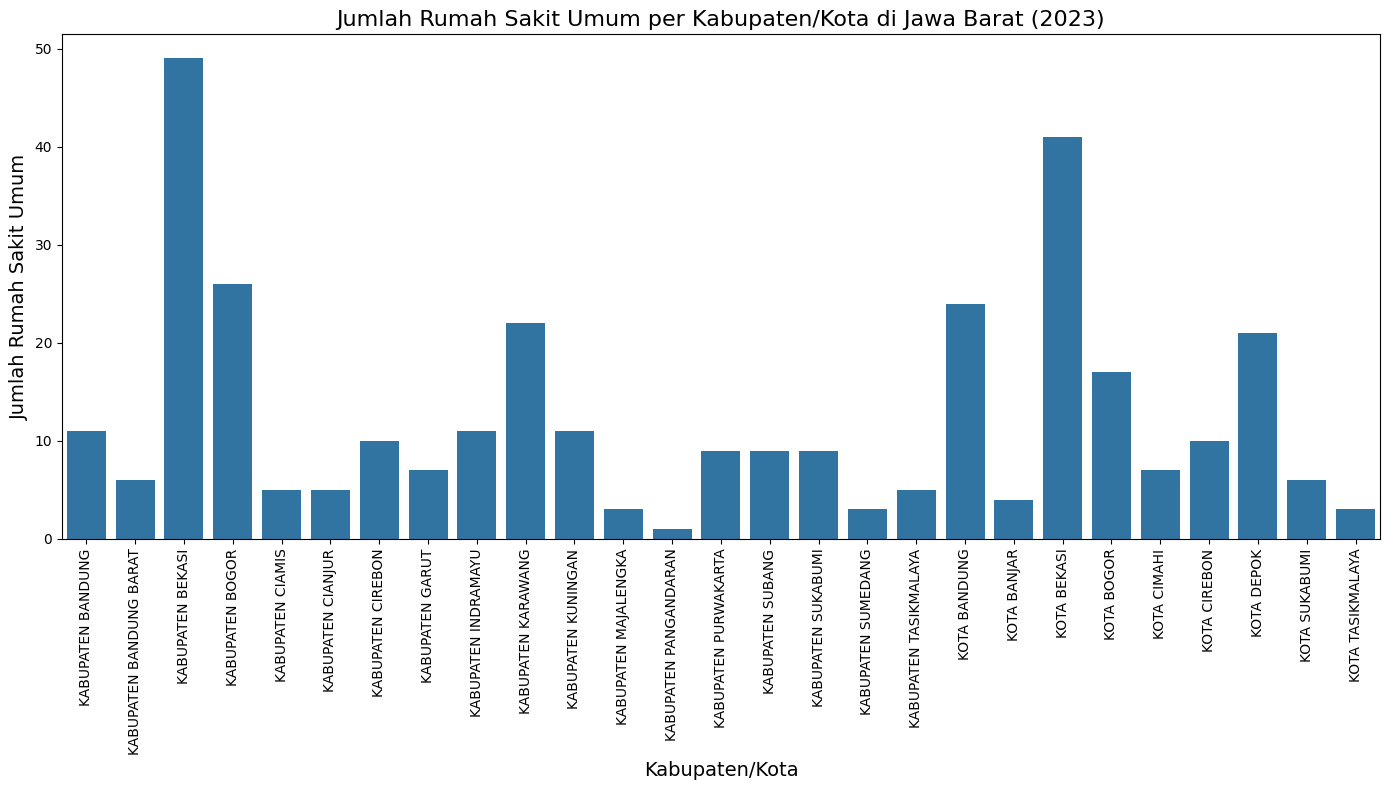

In [81]:
df_rumah_sakit_filtered = df_rumah_sakit[
    (df_rumah_sakit['tahun'] == 2023) &
    (df_rumah_sakit['jenis_rumah_sakit'].isin(['RUMAH SAKIT UMUM', 'RSU']))
]

# Menghitung jumlah rumah sakit umum di setiap kabupaten/kota
df_jumlah_rs_umum_per_kab = df_rumah_sakit_filtered.groupby('nama_kabupaten_kota').size().reset_index(name='jumlah_rumah_sakit_umum')

# Menampilkan hasil pengelompokan
print("Jumlah Rumah Sakit Umum di Jawa Barat Tahun 2023:")
print(df_jumlah_rs_umum_per_kab)

# Membuat bar plot untuk jumlah rumah sakit umum per kabupaten/kota
plt.figure(figsize=(14, 8))
sns.barplot(data=df_jumlah_rs_umum_per_kab, x='nama_kabupaten_kota', y='jumlah_rumah_sakit_umum', errorbar=None)

# Menambahkan judul dan label
plt.title('Jumlah Rumah Sakit Umum per Kabupaten/Kota di Jawa Barat (2023)', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Jumlah Rumah Sakit Umum', fontsize=14)
plt.xticks(rotation=90)

# Tampilkan plot
plt.tight_layout()
plt.show()

###Kesimpulan
#####Berdasarkan data tahun 2023, Kabupaten Bekasi dan Kota Bekasi memiliki jumlah rumah sakit umum terbanyak di Jawa Barat, masing-masing lebih dari 40 rumah sakit. Kota Bandung dan Kabupaten Bogor juga memiliki jumlah yang cukup tinggi. Sebaliknya, beberapa wilayah seperti Kabupaten Pangandaran dan Kabupaten Majalengka memiliki jumlah rumah sakit yang sangat sedikit, sekitar 1-3 rumah sakit. Secara keseluruhan, ada ketimpangan distribusi rumah sakit, dengan lebih banyak rumah sakit di wilayah perkotaan dan kabupaten besar, sementara daerah lain memiliki akses yang lebih terbatas.

##Studi Kasus  : Tren Jumlah Kematian Dan Penyebabnya (2017-2019)

###Latar Belakang:
#####Tren jumlah kematian dan penyebabnya merupakan aspek penting dalam memahami kesehatan masyarakat suatu wilayah. Data kematian dapat memberikan gambaran tentang kondisi kesehatan, prevalensi penyakit, dan efektivitas sistem kesehatan dalam menangani masalah kesehatan yang ada. Dari tahun 2017 hingga 2019, analisis tren kematian dan penyebabnya sangat diperlukan untuk mengidentifikasi pola, faktor risiko, dan area yang memerlukan perhatian lebih. Hal ini juga dapat membantu dalam perencanaan kebijakan kesehatan yang lebih baik untuk mencegah kematian yang dapat dicegah.

###Tujuan Analisis:
#####Menganalisis tren jumlah kematian selama periode 2017 hingga 2019 untuk memahami pola perubahan yang terjadi.

Jumlah Kematian Berdasarkan Penyebab (2017-2019), Tidak Termasuk 'Lain Lain' (Urut Berdasarkan Jumlah):
     penyebab_kematian  jumlah_kematian
1                 BBLR             3129
0             ASFIKSIA             2167
10            KELAINAN              879
8           HIPERTENSI              632
13          PENDARAHAN              602
14           PNEUMONIA              359
6       GANGGUAN DARAH              287
16              SEPSIS              249
4                DIARE              220
9              INFEKSI               87
15       SALURAN CERNA               59
3                DEMAM               56
7   GANGGUAN METABOLIK               29
11      KELAINAN SARAF               20
17             TETANUS               15
12             MALARIA                5
2               CAMPAK                2
5              DIFTERI                1


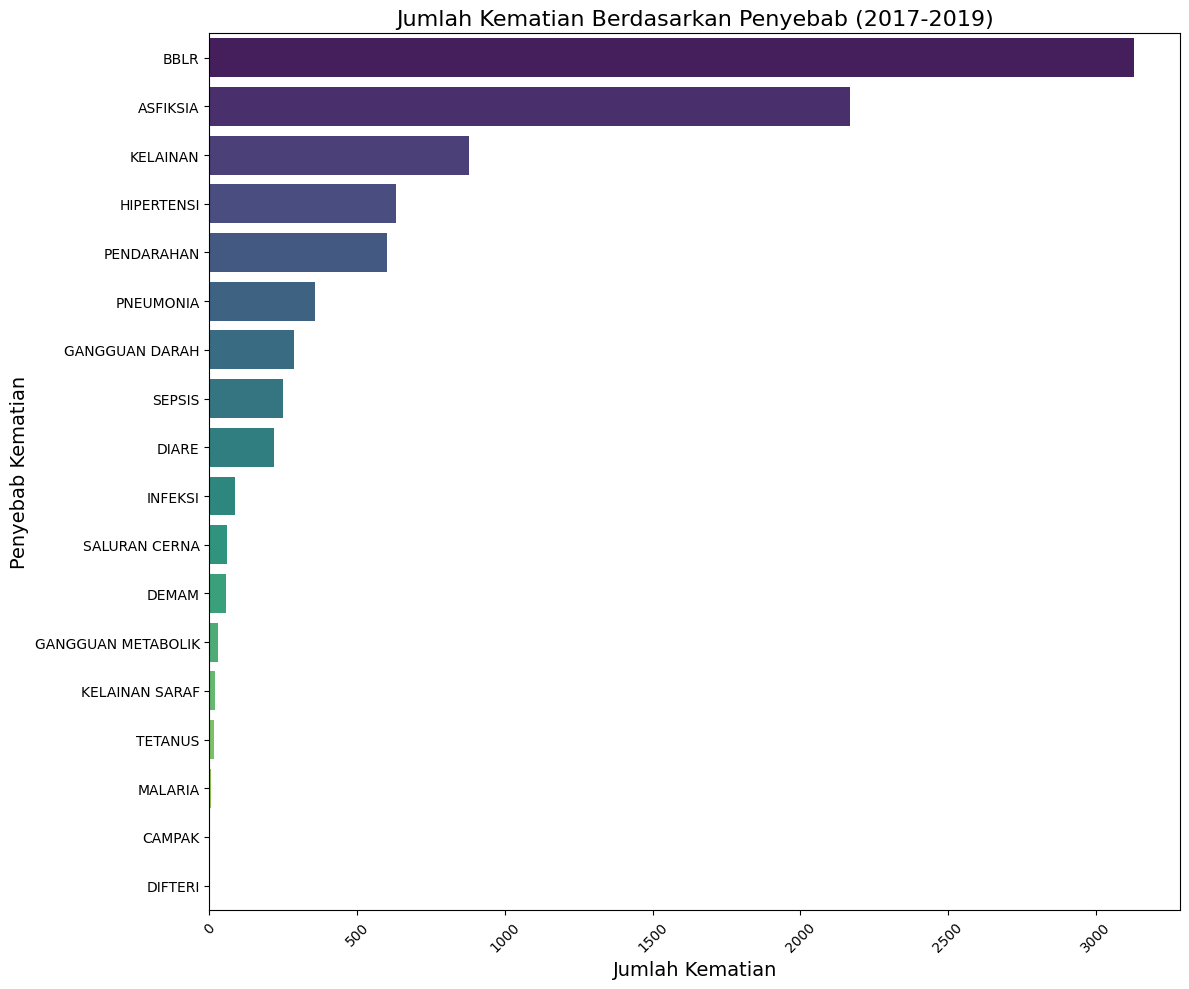

In [84]:
# Filter data untuk tahun 2017 hingga 2019
df_kematian_filtered = df_kematian[
    (df_kematian['tahun'] >= 2017) &
    (df_kematian['tahun'] <= 2019) &
    (df_kematian['penyebab_kematian'] != 'LAIN-LAIN')
]

# Menghitung jumlah kematian berdasarkan penyebab kematian
df_kematian_total = df_kematian_filtered.groupby('penyebab_kematian')['jumlah_kematian'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah kematian dari yang terbanyak
df_kematian_total = df_kematian_total.sort_values(by='jumlah_kematian', ascending=False)

# Menampilkan hasil pengelompokan
print("Jumlah Kematian Berdasarkan Penyebab (2017-2019), Tidak Termasuk 'Lain Lain' (Urut Berdasarkan Jumlah):")
print(df_kematian_total)

# Membuat bar plot dengan orientasi horizontal dan warna yang lebih bervariasi
plt.figure(figsize=(12, 10))
sns.barplot(data=df_kematian_total, x='jumlah_kematian', y='penyebab_kematian', palette='viridis', hue='penyebab_kematian', dodge=False)
plt.legend([],[], frameon=False)  # Menghilangkan legenda

# Menambahkan judul dan label
plt.title('Jumlah Kematian Berdasarkan Penyebab (2017-2019)', fontsize=16)
plt.xlabel('Jumlah Kematian', fontsize=14)
plt.ylabel('Penyebab Kematian', fontsize=14)

# Memiringkan label sumbu X
plt.xticks(rotation=45)

# Tampilkan plot
plt.tight_layout()
plt.show()


###Kesimpulan
#####Berdasarkan data dari tahun 2017 hingga 2019, Bayi Berat Lahir Rendah (BBLR) menjadi penyebab kematian terbanyak, diikuti oleh asfiksia, yaitu kondisi di mana bayi kekurangan oksigen saat lahir. Kelainan bawaan, tekanan darah tinggi pada ibu hamil, dan pendarahan juga menjadi penyebab yang sering terjadi. Selain itu, penyakit infeksi seperti pneumonia dan sepsis juga berkontribusi pada kematian, meskipun dalam jumlah lebih rendah. Penyebab lain, seperti diare, infeksi, dan gangguan metabolik, memiliki angka yang lebih kecil tetapi tetap perlu perhatian. Secara keseluruhan, ini menunjukkan pentingnya perawatan yang baik selama kehamilan, persalinan, serta penanganan cepat terhadap infeksi dan komplikasi.